# Insurance Claims- Fraud Detection
Problem Statement:
Business case:
Insurance fraud is a huge problem in the industry. It's difficult to identify fraud claims. Machine Learning is in a unique position to help the Auto Insurance industry with this problem.

In this project, you are provided a dataset which has the details of the insurance policy along with the customer details. It also has the details of the accident on the basis of which the claims have been made. 

In this example, you will be working with some auto insurance data to demonstrate how you can create a predictive model that predicts if an insurance claim is fraudulent or not. 

In [111]:
#let import necessary libraries
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn.metrics import accuracy_score

In [112]:
df=pd.read_csv('Insurance_fraud_detection.csv')

In [113]:
df

months_as_customer  age  policy_number policy_bind_date policy_state  \
0                   328   48         521585       17-10-2014           OH   
1                   228   42         342868       27-06-2006           IN   
2                   134   29         687698       06-09-2000           OH   
3                   256   41         227811       25-05-1990           IL   
4                   228   44         367455       06-06-2014           IL   
..                  ...  ...            ...              ...          ...   
995                   3   38         941851       16-07-1991           OH   
996                 285   41         186934       05-01-2014           IL   
997                 130   34         918516       17-02-2003           OH   
998                 458   62         533940       18-11-2011           IL   
999                 456   60         556080       11-11-1996           OH   

    policy_csl  policy_deductable  policy_annual_premium  umbrella_limit  \
0      250/500               1000                1406.91               0   
1      250/500               2000                1197.22         5000000   
2      100/300               2000                1413.14         5000000   
3      250/500               2000                1415.74         6000000   
4     500/1000               1000                1583.91         6000000   
..         ...                ...                    ...             ...   
995   500/1000               1000                1310.80               0   
996    100/300               1000                1436.79               0   
997    250/500                500                1383.49         3000000   
998   500/1000               2000                1356.92         5000000   
999    250/500               1000                 766.19               0   

     insured_zip  ... police_report_available total_claim_amount injury_claim  \
0         466132  ...                     YES              71610         6510   
1         468176  ...                       ?               5070          780   
2         430632  ...                      NO              34650         7700   
3         608117  ...                      NO              63400         6340   
4         610706  ...                      NO               6500         1300   
..           ...  ...                     ...                ...          ...   
995       431289  ...                       ?              87200        17440   
996       608177  ...                       ?             108480        18080   
997       442797  ...                     YES              67500         7500   
998       441714  ...                     YES              46980         5220   
999       612260  ...                       ?               5060          460   

    property_claim vehicle_claim   auto_make  auto_model auto_year  \
0            13020         52080        Saab         92x      2004   
1              780          3510    Mercedes        E400      2007   
2             3850         23100       Dodge         RAM      2007   
3             6340         50720   Chevrolet       Tahoe      2014   
4              650          4550      Accura         RSX      2009   
..             ...           ...         ...         ...       ...   
995           8720         61040       Honda      Accord      2006   
996          18080         72320  Volkswagen      Passat      2015   
997           7500         52500      Suburu     Impreza      1996   
998           5220         36540        Audi          A5      1998   
999            920          3680    Mercedes        E400      2007   

    fraud_reported _c39  
0                Y  NaN  
1                Y  NaN  
2                N  NaN  
3                Y  NaN  
4                N  NaN  
..             ...  ...  
995              N  NaN  
996              N  NaN  
997              N  NaN  
998              N  NaN  
999              N  NaN  

[1000 rows x 40 columns]

observations:
    
    1. All the feature columns are self explanatory.

In [114]:
df.head(5)

months_as_customer  age  policy_number policy_bind_date policy_state  \
0                 328   48         521585       17-10-2014           OH   
1                 228   42         342868       27-06-2006           IN   
2                 134   29         687698       06-09-2000           OH   
3                 256   41         227811       25-05-1990           IL   
4                 228   44         367455       06-06-2014           IL   

  policy_csl  policy_deductable  policy_annual_premium  umbrella_limit  \
0    250/500               1000                1406.91               0   
1    250/500               2000                1197.22         5000000   
2    100/300               2000                1413.14         5000000   
3    250/500               2000                1415.74         6000000   
4   500/1000               1000                1583.91         6000000   

   insured_zip  ... police_report_available total_claim_amount injury_claim  \
0       466132  ...                     YES              71610         6510   
1       468176  ...                       ?               5070          780   
2       430632  ...                      NO              34650         7700   
3       608117  ...                      NO              63400         6340   
4       610706  ...                      NO               6500         1300   

  property_claim vehicle_claim  auto_make  auto_model auto_year  \
0          13020         52080       Saab         92x      2004   
1            780          3510   Mercedes        E400      2007   
2           3850         23100      Dodge         RAM      2007   
3           6340         50720  Chevrolet       Tahoe      2014   
4            650          4550     Accura         RSX      2009   

  fraud_reported _c39  
0              Y  NaN  
1              Y  NaN  
2              N  NaN  
3              Y  NaN  
4              N  NaN  

[5 rows x 40 columns]

# EDA Process:¶
In choosing the right features to feed into our model, we want to capture the input variables most strongly related to the target variable.

In [115]:
df.dtypes

months_as_customer               int64
age                              int64
policy_number                    int64
policy_bind_date                object
policy_state                    object
policy_csl                      object
policy_deductable                int64
policy_annual_premium          float64
umbrella_limit                   int64
insured_zip                      int64
insured_sex                     object
insured_education_level         object
insured_occupation              object
insured_hobbies                 object
insured_relationship            object
capital-gains                    int64
capital-loss                     int64
incident_date                   object
incident_type                   object
collision_type                  object
incident_severity               object
authorities_contacted           object
incident_state                  object
incident_city                   object
incident_location               object
incident_hour_of_the_day 

observations:

1.from above code we find that major variables are object data type so we have to convert them into int data type by using label encoder.

In [116]:
df.shape

(1000, 40)

observations:

    1. 32560 rows and 15 columns are present in dataset

In [117]:
df.columns

Index(['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported', '_c39'],
      dtype='object')

In [118]:
df.fraud_reported.value_counts()

N    753
Y    247
Name: fraud_reported, dtype: int64

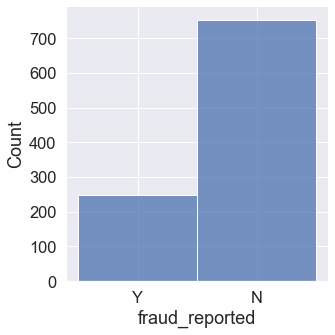

In [119]:
sns.displot(df['fraud_reported'])

Observations:

1.As seen from above distribution plot that Fraud_detection feature column  are not equally distributed,Hence we have to use imbalance learn for data balancing.

In [120]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

observations:

1.from above code we can easily find that there is no nan values are fresent in dataset.

In [121]:
df.isnull().sum()

months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                    0
incident_severity                 0
authorities_contacted             0
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

<AxesSubplot:>

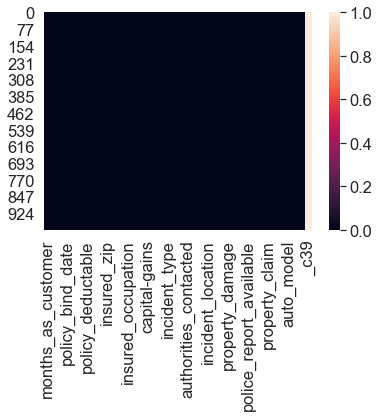

In [122]:
import seaborn as sns
sns.heatmap(df.isnull())

Observations:

1.As seen from above heatmap plot that feature column having nan values..

# Data Preprocessing

In [123]:
df._c39.value_counts()

Series([], Name: _c39, dtype: int64)

In [124]:
df.shape

(1000, 40)

In [125]:
df

months_as_customer  age  policy_number policy_bind_date policy_state  \
0                   328   48         521585       17-10-2014           OH   
1                   228   42         342868       27-06-2006           IN   
2                   134   29         687698       06-09-2000           OH   
3                   256   41         227811       25-05-1990           IL   
4                   228   44         367455       06-06-2014           IL   
..                  ...  ...            ...              ...          ...   
995                   3   38         941851       16-07-1991           OH   
996                 285   41         186934       05-01-2014           IL   
997                 130   34         918516       17-02-2003           OH   
998                 458   62         533940       18-11-2011           IL   
999                 456   60         556080       11-11-1996           OH   

    policy_csl  policy_deductable  policy_annual_premium  umbrella_limit  \
0      250/500               1000                1406.91               0   
1      250/500               2000                1197.22         5000000   
2      100/300               2000                1413.14         5000000   
3      250/500               2000                1415.74         6000000   
4     500/1000               1000                1583.91         6000000   
..         ...                ...                    ...             ...   
995   500/1000               1000                1310.80               0   
996    100/300               1000                1436.79               0   
997    250/500                500                1383.49         3000000   
998   500/1000               2000                1356.92         5000000   
999    250/500               1000                 766.19               0   

     insured_zip  ... police_report_available total_claim_amount injury_claim  \
0         466132  ...                     YES              71610         6510   
1         468176  ...                       ?               5070          780   
2         430632  ...                      NO              34650         7700   
3         608117  ...                      NO              63400         6340   
4         610706  ...                      NO               6500         1300   
..           ...  ...                     ...                ...          ...   
995       431289  ...                       ?              87200        17440   
996       608177  ...                       ?             108480        18080   
997       442797  ...                     YES              67500         7500   
998       441714  ...                     YES              46980         5220   
999       612260  ...                       ?               5060          460   

    property_claim vehicle_claim   auto_make  auto_model auto_year  \
0            13020         52080        Saab         92x      2004   
1              780          3510    Mercedes        E400      2007   
2             3850         23100       Dodge         RAM      2007   
3             6340         50720   Chevrolet       Tahoe      2014   
4              650          4550      Accura         RSX      2009   
..             ...           ...         ...         ...       ...   
995           8720         61040       Honda      Accord      2006   
996          18080         72320  Volkswagen      Passat      2015   
997           7500         52500      Suburu     Impreza      1996   
998           5220         36540        Audi          A5      1998   
999            920          3680    Mercedes        E400      2007   

    fraud_reported _c39  
0                Y  NaN  
1                Y  NaN  
2                N  NaN  
3                Y  NaN  
4                N  NaN  
..             ...  ...  
995              N  NaN  
996              N  NaN  
997              N  NaN  
998              N  NaN  
999              N  NaN  

[1000 rows x 40 columns]

# Drop some non related feature Columns:

In [126]:
df=df.drop(['_c39'], axis=1)

In [127]:
df=df.drop(['policy_number','policy_bind_date','incident_location'], axis=1)

<AxesSubplot:>

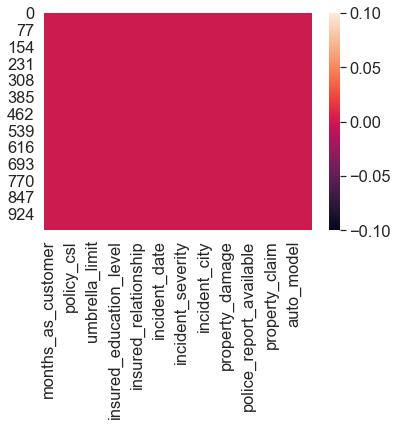

In [128]:
import seaborn as sns
sns.heatmap(df.isnull())

Observations:

1.As seen from above heatmap plot that feature column having no-nan values..

# Univariate analysis
Univariate analysis is the simplest form of analyzing data.

#lets start with Distribution ploting.

194    8
285    7
140    7
230    7
128    7
      ..
347    1
113    1
337    1
117    1
0      1
Name: months_as_customer, Length: 391, dtype: int64

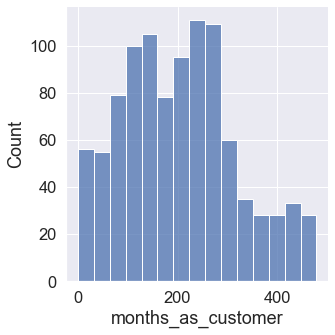

In [129]:
sns.displot(df['months_as_customer'])
df.months_as_customer.value_counts()

OH    352
IL    338
IN    310
Name: policy_state, dtype: int64

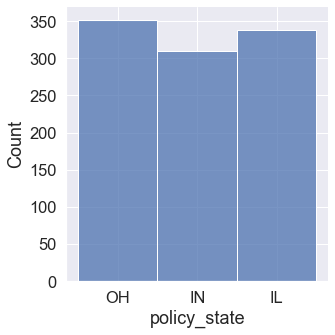

In [130]:
sns.displot(df['policy_state'])
df.policy_state.value_counts()

1000    351
500     342
2000    307
Name: policy_deductable, dtype: int64

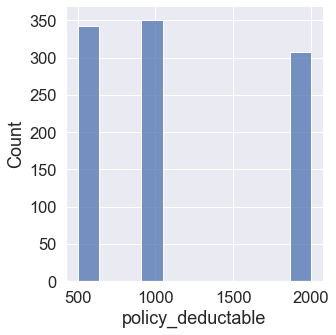

In [131]:
sns.displot(df['policy_deductable'])
df.policy_deductable.value_counts()

 0           798
 6000000      57
 5000000      46
 4000000      39
 7000000      29
 3000000      12
 8000000       8
 9000000       5
 2000000       3
 10000000      2
-1000000       1
Name: umbrella_limit, dtype: int64

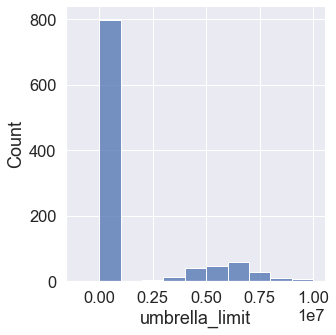

In [132]:
sns.displot(df['umbrella_limit'])
df.umbrella_limit.value_counts()

FEMALE    537
MALE      463
Name: insured_sex, dtype: int64

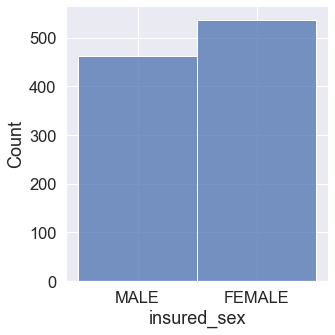

In [133]:
sns.displot(df['insured_sex'])
df.insured_sex.value_counts()

machine-op-inspct    93
prof-specialty       85
tech-support         78
exec-managerial      76
sales                76
craft-repair         74
transport-moving     72
priv-house-serv      71
other-service        71
armed-forces         69
adm-clerical         65
protective-serv      63
handlers-cleaners    54
farming-fishing      53
Name: insured_occupation, dtype: int64

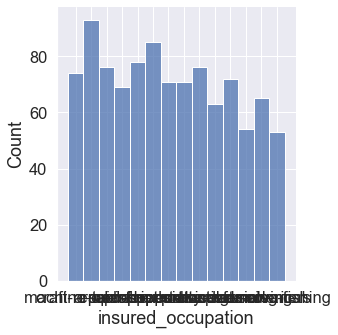

In [134]:
sns.displot(df['insured_occupation'])
df.insured_occupation.value_counts()

own-child         183
other-relative    177
not-in-family     174
husband           170
wife              155
unmarried         141
Name: insured_relationship, dtype: int64

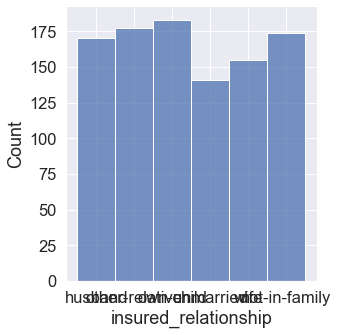

In [135]:
sns.displot(df['insured_relationship'])
df.insured_relationship.value_counts()

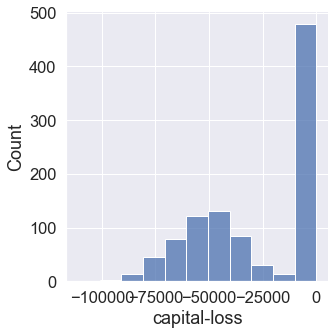

In [136]:
sns.displot(df['capital-loss'])


Multi-vehicle Collision     419
Single Vehicle Collision    403
Vehicle Theft                94
Parked Car                   84
Name: incident_type, dtype: int64

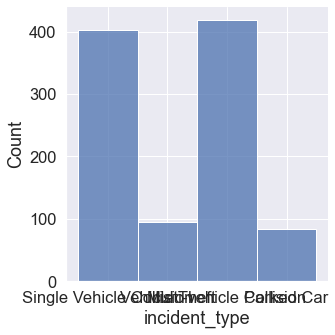

In [137]:
sns.displot(df['incident_type'])
df.incident_type.value_counts()

Minor Damage      354
Total Loss        280
Major Damage      276
Trivial Damage     90
Name: incident_severity, dtype: int64

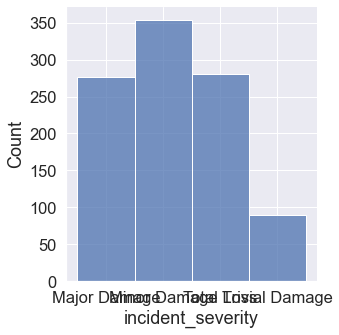

In [138]:
sns.displot(df['incident_severity'])
df.incident_severity.value_counts()

NY    262
SC    248
WV    217
NC    110
VA    110
PA     30
OH     23
Name: incident_state, dtype: int64

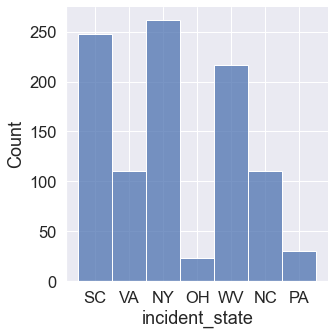

In [139]:
sns.displot(df['incident_state'])
df.incident_state.value_counts()

1    581
3    358
4     31
2     30
Name: number_of_vehicles_involved, dtype: int64

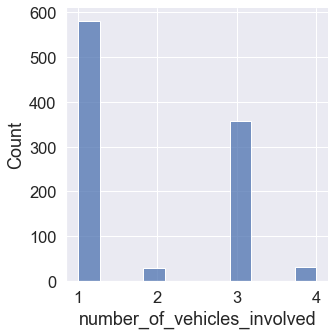

In [140]:
sns.displot(df['number_of_vehicles_involved'])
df.number_of_vehicles_involved.value_counts()

0    340
2    332
1    328
Name: bodily_injuries, dtype: int64

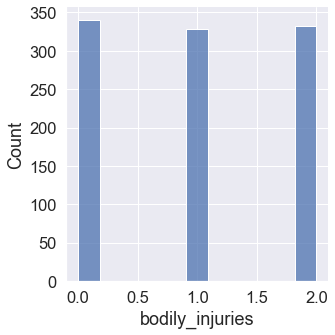

In [141]:
sns.displot(df['bodily_injuries'])
df.bodily_injuries.value_counts()

?      343
NO     343
YES    314
Name: police_report_available, dtype: int64

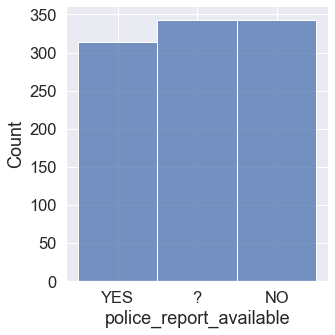

In [142]:
sns.displot(df['police_report_available'])
df.police_report_available.value_counts()

0        25
480       7
640       7
580       5
6340      5
         ..
16820     1
5960      1
10840     1
8000      1
5530      1
Name: injury_claim, Length: 638, dtype: int64

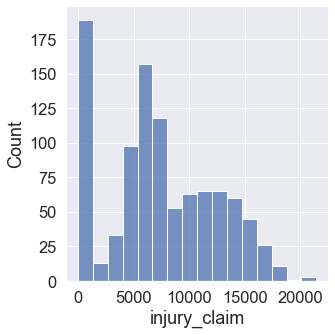

In [143]:
sns.displot(df['injury_claim'])
df.injury_claim.value_counts()

5040     7
3360     6
3600     5
44800    5
33600    5
        ..
46680    1
3640     1
34320    1
40530    1
51200    1
Name: vehicle_claim, Length: 726, dtype: int64

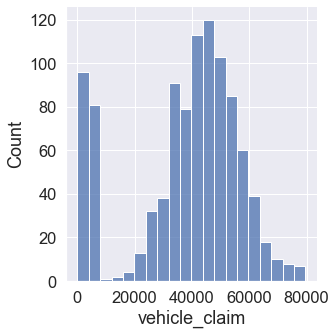

In [144]:
sns.displot(df['vehicle_claim'])
df.vehicle_claim.value_counts()

RAM               43
Wrangler          42
A3                37
Neon              37
MDX               36
Jetta             35
Passat            33
Legacy            32
A5                32
Pathfinder        31
Malibu            30
92x               28
Camry             28
Forrestor         28
95                27
E400              27
F150              27
93                25
Grand Cherokee    25
Maxima            24
Tahoe             24
Escape            24
X5                23
Ultima            23
Civic             22
Silverado         22
Highlander        22
Fusion            21
TL                20
ML350             20
CRV               20
Corolla           20
Impreza           20
3 Series          18
C300              18
X6                16
M5                15
Accord            13
RSX               12
Name: auto_model, dtype: int64

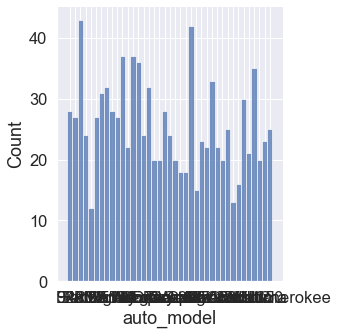

In [145]:
sns.displot(df['auto_model'])
df.auto_model.value_counts()

Observations:

    1. From above plotting of distribution curves data mojor feature columns are not normalized.

# Multivariate Analysis
Multivariate analysis is a set of techniques used for analysis of data sets that contain more than one variable

<AxesSubplot:xlabel='insured_occupation', ylabel='policy_deductable'>

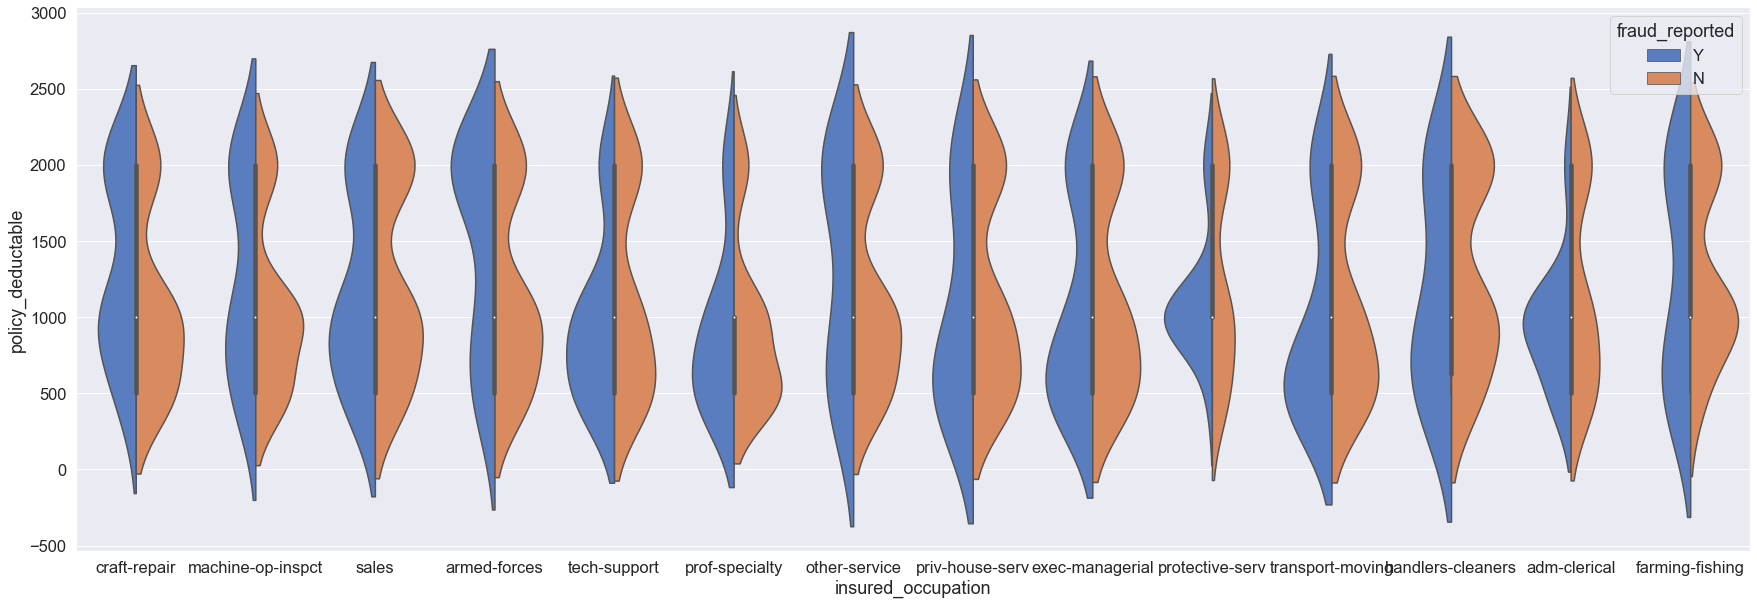

In [146]:
from matplotlib import pyplot
a4_dims = (30, 10)
sns.set(font_scale=1.5)
fig, ax = pyplot.subplots(figsize=a4_dims)
ax = sns.violinplot(x="insured_occupation", y="policy_deductable", hue="fraud_reported",
                    data=df, gridsize=100, palette="muted", split=True, saturation=0.75)
ax

In [ ]:
Observations:

    1.

<AxesSubplot:xlabel='insured_occupation', ylabel='months_as_customer'>

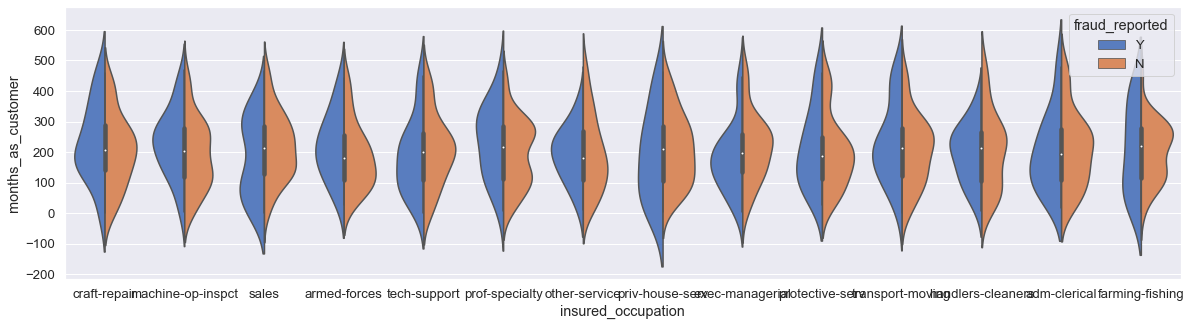

In [147]:
from matplotlib import pyplot
a4_dims = (20, 5)
sns.set(font_scale=1.2)
fig, ax = pyplot.subplots(figsize=a4_dims)
ax = sns.violinplot(x="insured_occupation", y="months_as_customer", hue="fraud_reported",
                    data=df, gridsize=100, palette="muted", split=True, saturation=0.75)
ax

observations:
    
    1. maximum frauds happening during initals months, as policy is fresh.

<AxesSubplot:xlabel='insured_occupation', ylabel='age'>

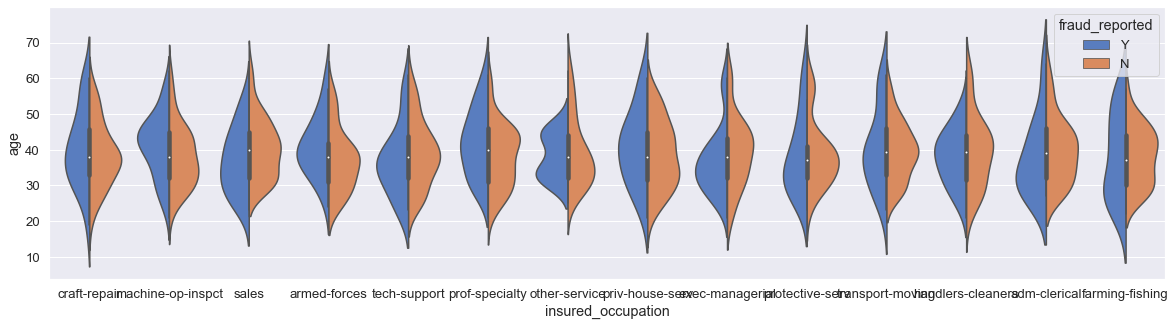

In [148]:
from matplotlib import pyplot
a4_dims = (20, 5)
fig, ax = pyplot.subplots(figsize=a4_dims)
ax = sns.violinplot(y="age", x="insured_occupation", hue="fraud_reported",
                    data=df, gridsize=100, palette="muted", split=True, saturation=0.75)
ax

Observations:
    
     1. 30-50 age groups reported maximum fruads.

<AxesSubplot:xlabel='insured_occupation', ylabel='policy_annual_premium'>

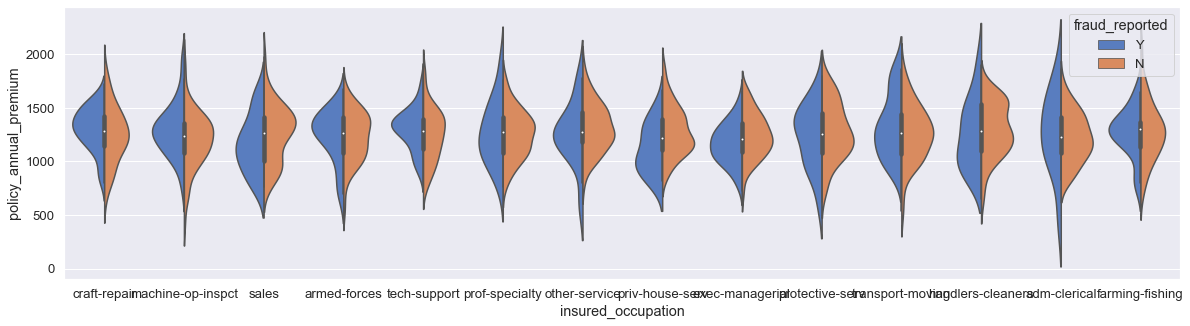

In [149]:
from matplotlib import pyplot
a4_dims = (20, 5)
fig, ax = pyplot.subplots(figsize=a4_dims)
ax = sns.violinplot(y="policy_annual_premium", x="insured_occupation", hue="fraud_reported",
                    data=df, gridsize=100, palette="muted", split=True, saturation=0.75)
ax

Observations:

    1. As anual premium increases frauds increased.

<AxesSubplot:xlabel='insured_occupation', ylabel='umbrella_limit'>

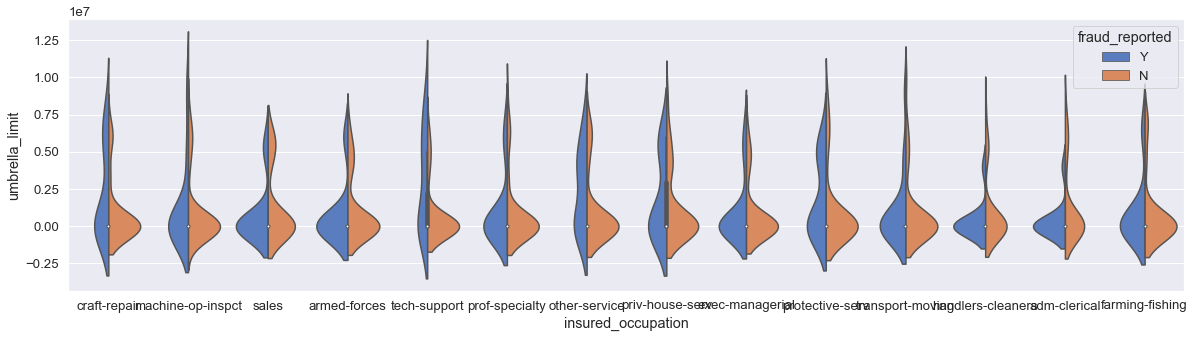

In [150]:
from matplotlib import pyplot
a4_dims = (20, 5)
fig, ax = pyplot.subplots(figsize=a4_dims)
ax = sns.violinplot(y="umbrella_limit", x="insured_occupation", hue="fraud_reported",
                    data=df, gridsize=100, palette="muted", split=True, saturation=0.75)
ax

Observations:
    
    1. as those having high umbrella limit they likely do less frauds.

<AxesSubplot:xlabel='insured_occupation', ylabel='witnesses'>

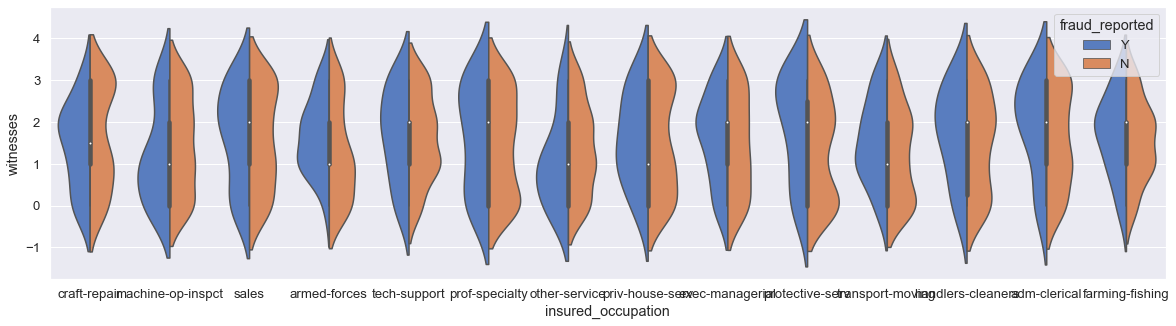

In [151]:
from matplotlib import pyplot
a4_dims = (20, 5)
fig, ax = pyplot.subplots(figsize=a4_dims)
ax = sns.violinplot(y="witnesses", x="insured_occupation", hue="fraud_reported",
                    data=df, gridsize=100, palette="muted", split=True, saturation=0.75)
ax

observations:
    
    1. more witness  more frauds.

<AxesSubplot:xlabel='insured_occupation', ylabel='property_claim'>

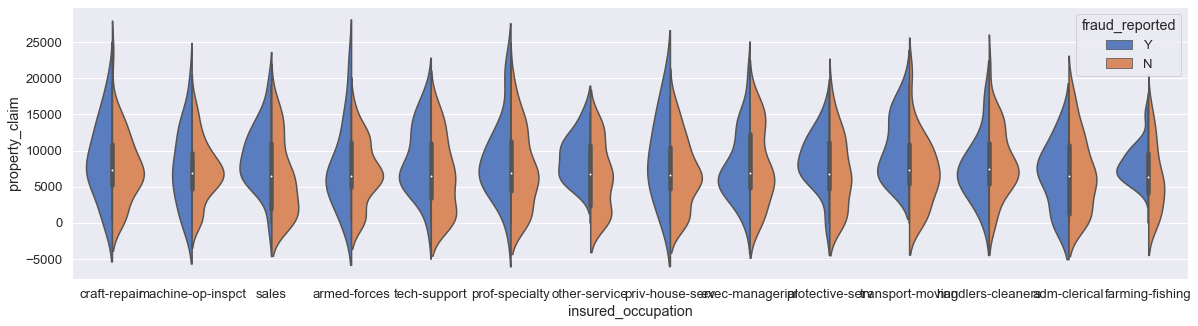

In [154]:
from matplotlib import pyplot
a4_dims = (20, 5)
fig, ax = pyplot.subplots(figsize=a4_dims)
ax = sns.violinplot(y="property_claim", x="insured_occupation", hue="fraud_reported",
                    data=df, gridsize=100, palette="muted", split=True, saturation=0.75)
ax

<AxesSubplot:xlabel='insured_occupation', ylabel='injury_claim'>

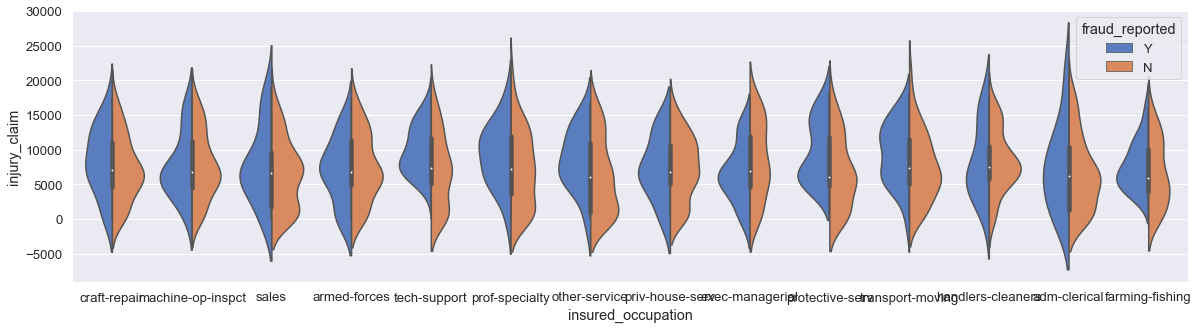

In [155]:
from matplotlib import pyplot
a4_dims = (20, 5)
fig, ax = pyplot.subplots(figsize=a4_dims)
ax = sns.violinplot(y="injury_claim", x="insured_occupation", hue="fraud_reported",
                    data=df, gridsize=100, palette="muted", split=True, saturation=0.75)
ax

<AxesSubplot:xlabel='insured_occupation', ylabel='capital-gains'>

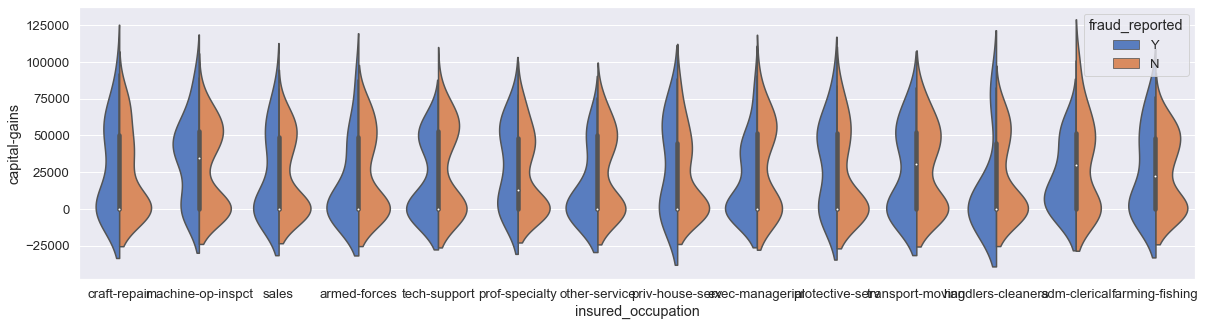

In [156]:
from matplotlib import pyplot
a4_dims = (20, 5)
fig, ax = pyplot.subplots(figsize=a4_dims)
ax = sns.violinplot(y="capital-gains", x="insured_occupation", hue="fraud_reported",
                    data=df, gridsize=100, palette="muted", split=True, saturation=0.75)
ax

<AxesSubplot:xlabel='insured_occupation', ylabel='capital-loss'>

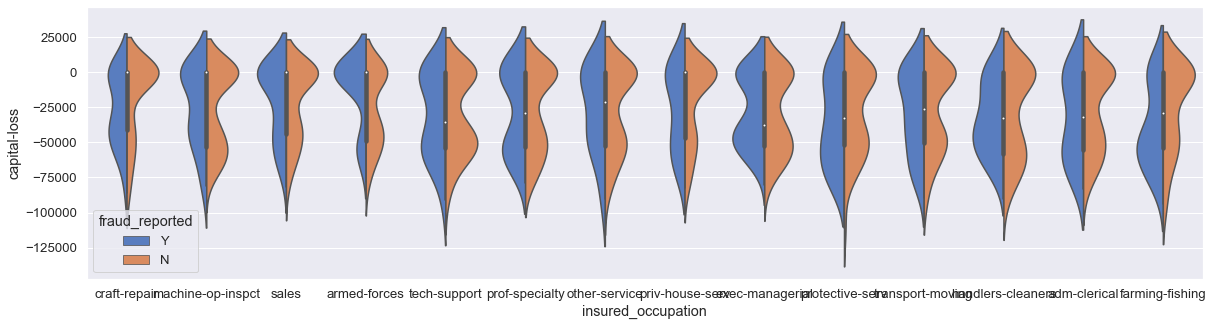

In [157]:
from matplotlib import pyplot
a4_dims = (20, 5)
fig, ax = pyplot.subplots(figsize=a4_dims)
ax = sns.violinplot(y="capital-loss", x="insured_occupation", hue="fraud_reported",
                    data=df, gridsize=100, palette="muted", split=True, saturation=0.75)
ax

<AxesSubplot:xlabel='insured_occupation', ylabel='auto_year'>

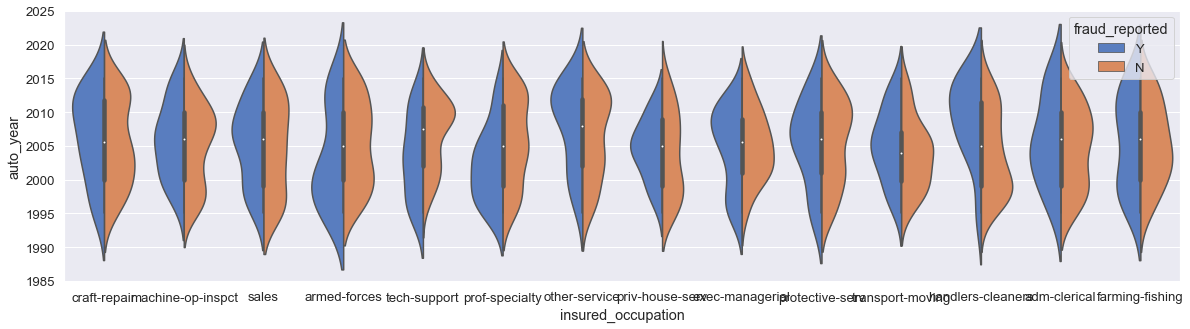

In [158]:
from matplotlib import pyplot
a4_dims = (20, 5)
fig, ax = pyplot.subplots(figsize=a4_dims)
ax = sns.violinplot(y="auto_year", x="insured_occupation", hue="fraud_reported",
                    data=df, gridsize=100, palette="muted", split=True, saturation=0.75)
ax

<AxesSubplot:xlabel='insured_occupation', ylabel='bodily_injuries'>

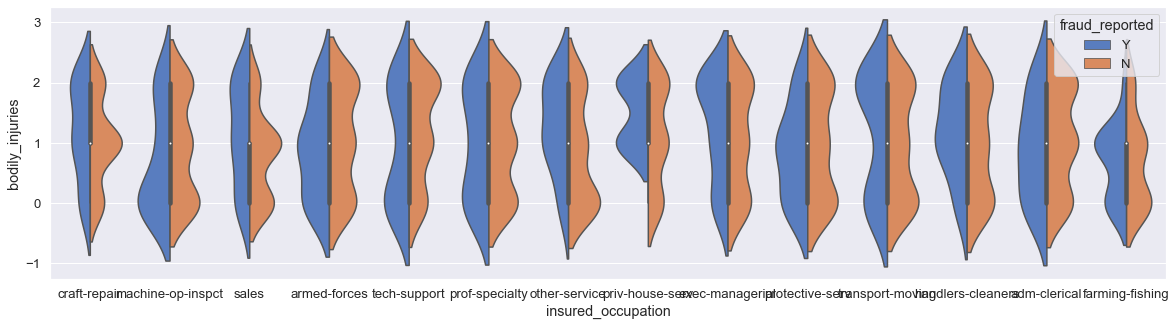

In [159]:
from matplotlib import pyplot
a4_dims = (20, 5)
fig, ax = pyplot.subplots(figsize=a4_dims)
ax = sns.violinplot(y="bodily_injuries", x="insured_occupation", hue="fraud_reported",
                    data=df, gridsize=100, palette="muted", split=True, saturation=0.75)
ax

<AxesSubplot:xlabel='insured_occupation', ylabel='number_of_vehicles_involved'>

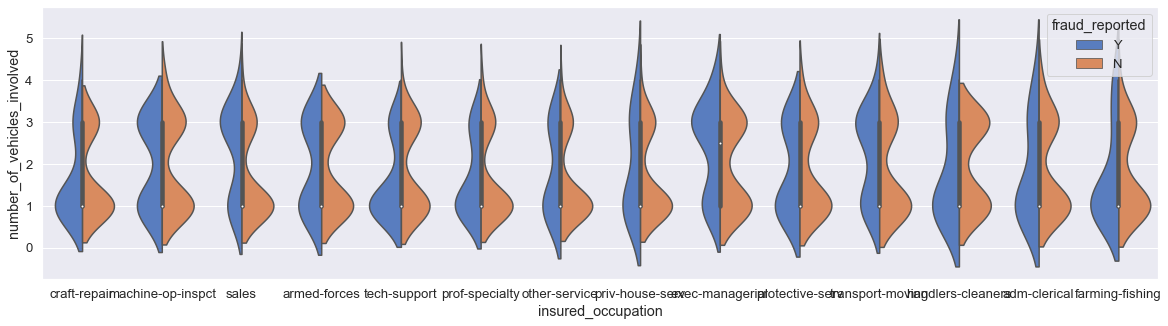

In [160]:
from matplotlib import pyplot
a4_dims = (20, 5)
fig, ax = pyplot.subplots(figsize=a4_dims)
ax = sns.violinplot(y="number_of_vehicles_involved", x="insured_occupation", hue="fraud_reported",
                    data=df, gridsize=100, palette="muted", split=True, saturation=0.75)
ax

# Label Encode the following Features:
we use labele Encoder for changing types of object data type to int datatype

In [161]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()


In [162]:
df['policy_state'] = le.fit_transform(df['policy_state'])
df['policy_csl'] = le.fit_transform(df['policy_csl'])
df['insured_sex'] = le.fit_transform(df['insured_sex'])
df['insured_education_level'] = le.fit_transform(df['insured_education_level'])
df['insured_occupation'] = le.fit_transform(df['insured_occupation'])
df['insured_hobbies'] = le.fit_transform(df['insured_hobbies'])
df['insured_relationship'] = le.fit_transform(df['insured_relationship'])
df['incident_date'] = le.fit_transform(df['incident_date'])
df['incident_type'] = le.fit_transform(df['incident_type'])
df['collision_type'] = le.fit_transform(df['collision_type'])
df['incident_severity'] = le.fit_transform(df['incident_severity'])
df['authorities_contacted'] = le.fit_transform(df['authorities_contacted'])
df['incident_state'] = le.fit_transform(df['incident_state'])
df['incident_type'] = le.fit_transform(df['incident_type'])
df['incident_city'] = le.fit_transform(df['incident_city'])
df['property_damage'] = le.fit_transform(df['property_damage'])
df['police_report_available'] = le.fit_transform(df['police_report_available'])
df['auto_make'] = le.fit_transform(df['auto_make'])
df['auto_model'] = le.fit_transform(df['auto_model'])
df['fraud_reported'] = le.fit_transform(df['fraud_reported'])

In [163]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 36 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_state                 1000 non-null   int32  
 3   policy_csl                   1000 non-null   int32  
 4   policy_deductable            1000 non-null   int64  
 5   policy_annual_premium        1000 non-null   float64
 6   umbrella_limit               1000 non-null   int64  
 7   insured_zip                  1000 non-null   int64  
 8   insured_sex                  1000 non-null   int32  
 9   insured_education_level      1000 non-null   int32  
 10  insured_occupation           1000 non-null   int32  
 11  insured_hobbies              1000 non-null   int32  
 12  insured_relationship         1000 non-null   int32  
 13  capital-gains      

# CORRELATION BETWEEN THE COLUMNS:

In [164]:
df.corr()

months_as_customer       age  policy_state  \
months_as_customer                     1.000000  0.922098     -0.000328   
age                                    0.922098  1.000000     -0.014533   
policy_state                          -0.000328 -0.014533      1.000000   
policy_csl                            -0.026819 -0.015185      0.001027   
policy_deductable                      0.026807  0.029188      0.010033   
policy_annual_premium                  0.005018  0.014404      0.012455   
umbrella_limit                         0.015498  0.018126     -0.029580   
insured_zip                            0.017895  0.025604      0.008777   
insured_sex                            0.060925  0.073337     -0.020481   
insured_education_level               -0.000833  0.000969     -0.034327   
insured_occupation                     0.009814  0.017220     -0.031215   
insured_hobbies                       -0.093661 -0.081315     -0.038689   
insured_relationship                   0.069727  0.074832     -0.018506   
capital-gains                          0.006399 -0.007075      0.074551   
capital-loss                           0.020209  0.007368     -0.030338   
incident_date                         -0.002985  0.002416      0.027287   
incident_type                         -0.017377 -0.025626      0.031848   
collision_type                        -0.017824 -0.018672      0.034739   
incident_severity                     -0.059581 -0.058439     -0.026377   
authorities_contacted                  0.010021  0.015417     -0.016777   
incident_state                         0.005369  0.005770      0.008723   
incident_city                         -0.000130 -0.002291     -0.002077   
incident_hour_of_the_day               0.070639  0.087161      0.029457   
number_of_vehicles_involved            0.014736  0.022102     -0.042263   
property_damage                        0.007040 -0.001486      0.008623   
bodily_injuries                       -0.010162 -0.015679      0.013384   
witnesses                              0.058383  0.052359      0.022960   
police_report_available                0.017647  0.014661      0.071950   
total_claim_amount                     0.062108  0.069863     -0.006002   
injury_claim                           0.065329  0.075522     -0.046290   
property_claim                         0.034940  0.060898      0.008406   
vehicle_claim                          0.061013  0.062588      0.001425   
auto_make                              0.047655  0.030410      0.017124   
auto_model                             0.004202  0.017343     -0.025253   
auto_year                             -0.000292  0.001354      0.002114   
fraud_reported                         0.020544  0.012143      0.029432   

                             policy_csl  policy_deductable  \
months_as_customer            -0.026819           0.026807   
age                           -0.015185           0.029188   
policy_state                   0.001027           0.010033   
policy_csl                     1.000000           0.003384   
policy_deductable              0.003384           1.000000   
policy_annual_premium          0.023978          -0.003245   
umbrella_limit                 0.021636           0.010870   
insured_zip                    0.006879           0.004545   
insured_sex                   -0.010757          -0.009733   
insured_education_level        0.009153           0.015217   
insured_occupation             0.015788          -0.046733   
insured_hobbies               -0.005960           0.004061   
insured_relationship          -0.030063          -0.022945   
capital-gains                  0.005249           0.035212   
capital-loss                  -0.034612          -0.023544   
incident_date                 -0.010140          -0.024055   
incident_type                  0.011997          -0.038411   
collision_type                -0.036687          -0.033182   
incident_severity              0.022530          -0.015711   
authorities_c

In [165]:
df.corr().tail(5)

months_as_customer       age  policy_state  policy_csl  \
vehicle_claim             0.061013  0.062588      0.001425   -0.046791   
auto_make                 0.047655  0.030410      0.017124   -0.004701   
auto_model                0.004202  0.017343     -0.025253    0.047885   
auto_year                -0.000292  0.001354      0.002114   -0.033082   
fraud_reported            0.020544  0.012143      0.029432   -0.037190   

                policy_deductable  policy_annual_premium  umbrella_limit  \
vehicle_claim            0.005269               0.020246       -0.038584   
auto_make               -0.035379               0.000045       -0.004443   
auto_model              -0.003268              -0.031849        0.040256   
auto_year                0.026105              -0.049226        0.009893   
fraud_reported           0.014817              -0.014480        0.058622   

                insured_zip  insured_sex  insured_education_level  ...  \
vehicle_claim     -0.041083    -0.029609                 0.068348  ...   
auto_make         -0.020892     0.026457                 0.055202  ...   
auto_model         0.023637    -0.018421                 0.049445  ...   
auto_year         -0.032736    -0.028247                 0.043509  ...   
fraud_reported     0.019368     0.030873                 0.008808  ...   

                witnesses  police_report_available  total_claim_amount  \
vehicle_claim   -0.022564                -0.002306            0.982773   
auto_make        0.005603                 0.038520           -0.057508   
auto_model      -0.011232                -0.026594            0.040762   
auto_year        0.045791                -0.013964           -0.035781   
fraud_reported   0.049497                -0.028159            0.163651   

                injury_claim  property_claim  vehicle_claim  auto_make  \
vehicle_claim       0.722878        0.732090       1.000000  -0.059427   
auto_make          -0.039575       -0.042030      -0.059427   1.000000   
auto_model          0.038136        0.048857       0.034645  -0.166295   
auto_year          -0.013718       -0.014508      -0.042768   0.004939   
fraud_reported      0.090975        0.137835       0.170049  -0.027519   

                auto_model  auto_year  fraud_reported  
vehicle_claim     0.034645  -0.042768        0.170049  
auto_make        -0.166295   0.004939       -0.027519  
auto_model        1.000000   0.032831        0.000720  
auto_year         0.032831   1.000000        0.007928  
fraud_reported    0.000720   0.007928        1.000000  

[5 rows x 36 columns]

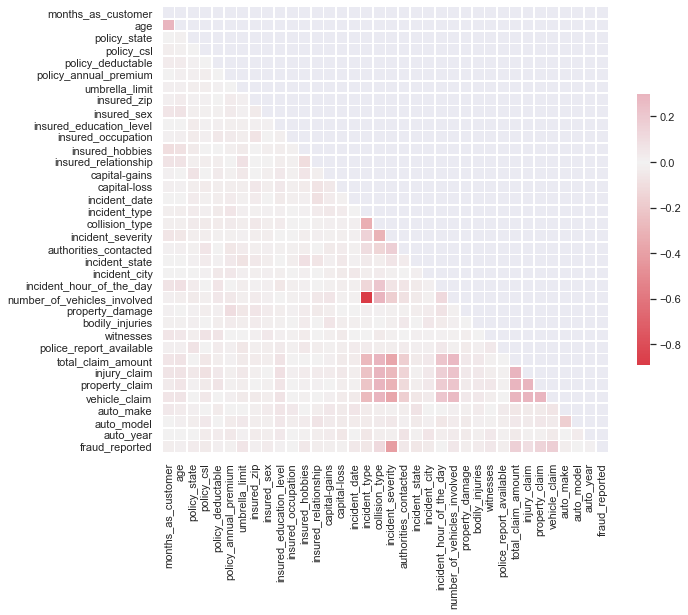

In [166]:
import matplotlib.pyplot as plt
import numpy as np
correlations = df.corr()
sns.set(style='dark')
cmap = sns.diverging_palette(10, 5, as_cmap=True)
mask = np.zeros_like(correlations, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(10,10))
sns.heatmap(correlations, mask=mask, cmap=cmap, vmax=.3, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.show()

Observations:
    1. collinearity is present in data set.

<AxesSubplot:>

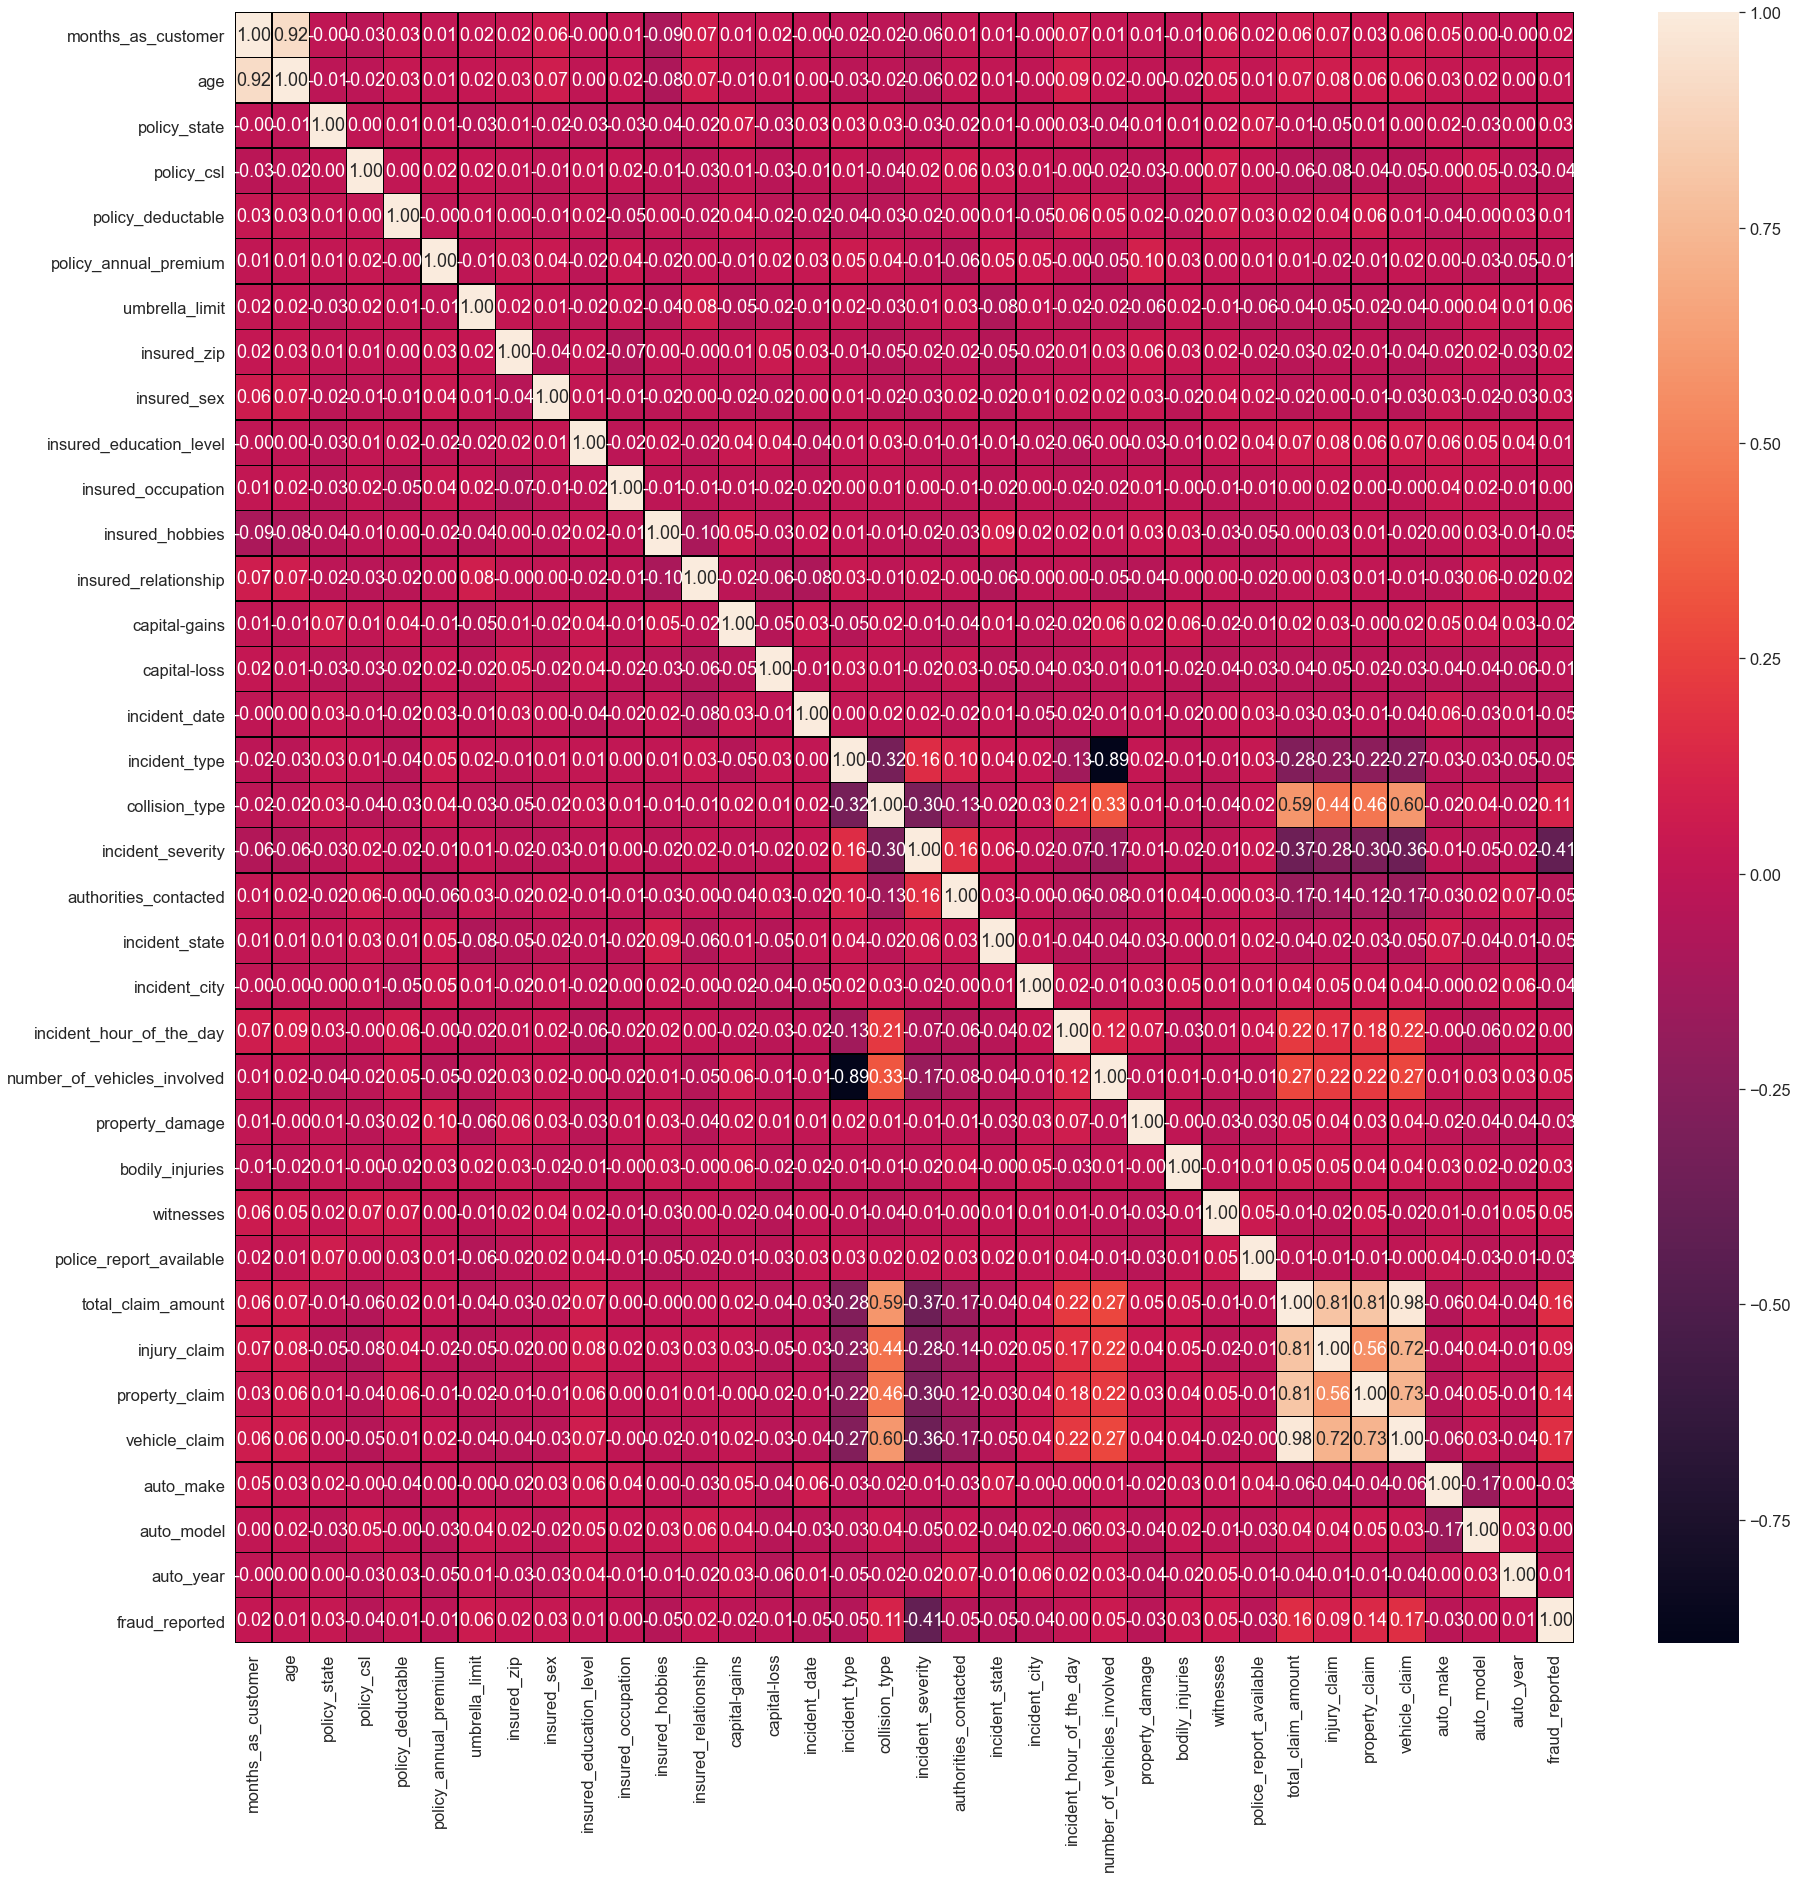

In [167]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(30,30))
sns.set(font_scale=1.5)
sns.heatmap(df.corr(), annot=True, linewidths=0.5,linecolor="black", fmt= '.2f')

Observations:
    
    1. total_claim,injury_claim,proerty_claim,vechile claim having multi collinearity.
    
    2. lets cheak out using vif factor.

# Discription of dataset:

In [168]:
df.describe()

months_as_customer          age  policy_state   policy_csl  \
count         1000.000000  1000.000000    1000.00000  1000.000000   
mean           203.954000    38.948000       1.01400     0.951000   
std            115.113174     9.140287       0.83096     0.804516   
min              0.000000    19.000000       0.00000     0.000000   
25%            115.750000    32.000000       0.00000     0.000000   
50%            199.500000    38.000000       1.00000     1.000000   
75%            276.250000    44.000000       2.00000     2.000000   
max            479.000000    64.000000       2.00000     2.000000   

       policy_deductable  policy_annual_premium  umbrella_limit  \
count        1000.000000            1000.000000    1.000000e+03   
mean         1136.000000            1256.406150    1.101000e+06   
std           611.864673             244.167395    2.297407e+06   
min           500.000000             433.330000   -1.000000e+06   
25%           500.000000            1089.607500    0.000000e+00   
50%          1000.000000            1257.200000    0.000000e+00   
75%          2000.000000            1415.695000    0.000000e+00   
max          2000.000000            2047.590000    1.000000e+07   

         insured_zip  insured_sex  insured_education_level  ...    witnesses  \
count    1000.000000  1000.000000              1000.000000  ...  1000.000000   
mean   501214.488000     0.463000                 2.966000  ...     1.487000   
std     71701.610941     0.498879                 1.948497  ...     1.111335   
min    430104.000000     0.000000                 0.000000  ...     0.000000   
25%    448404.500000     0.000000                 1.000000  ...     1.000000   
50%    466445.500000     0.000000                 3.000000  ...     1.000000   
75%    603251.000000     1.000000                 5.000000  ...     2.000000   
max    620962.000000     1.000000                 6.000000  ...     3.000000   

       police_report_available  total_claim_amount  injury_claim  \
count              1000.000000          1000.00000   1000.000000   
mean                  0.971000         52761.94000   7433.420000   
std                   0.810442         26401.53319   4880.951853   
min                   0.000000           100.00000      0.000000   
25%                   0.000000         41812.50000   4295.000000   
50%                   1.000000         58055.00000   6775.000000   
75%                   2.000000         70592.50000  11305.000000   
max                   2.000000        114920.00000  21450.000000   

       property_claim  vehicle_claim    auto_make   auto_model    auto_year  \
count     1000.000000    1000.000000  1000.000000  1000.000000  1000.000000   
mean      7399.570000   37928.950000     6.546000    19.318000  2005.103000   
std       4824.726179   18886.252893     4.034869    11.136107     6.015861   
min          0.000000      70.000000     0.000000     0.000000  1995.000000   
25%       4445.000000   30292.500000     3.000000    10.000000  2000.000000   
50%       6750.000000   42100.000000     7.000000    20.000000  2005.000000   
75%      10885.000000   50822.500000    10.000000    29.000000  2010.000000   
max      23670.000000   79560.000000    13.000000    38.000000  2015.000000   

       fraud_reported  
count     1000.000000  
mean         0.247000  
std          0.431483  
min          0.000000  
25%          0.000000  
50%          0.000000  
75%          0.000000  
max          1.000000  

[8 rows x 36 columns]

# PLOTTING THE DISCRIPTION OF DATASET

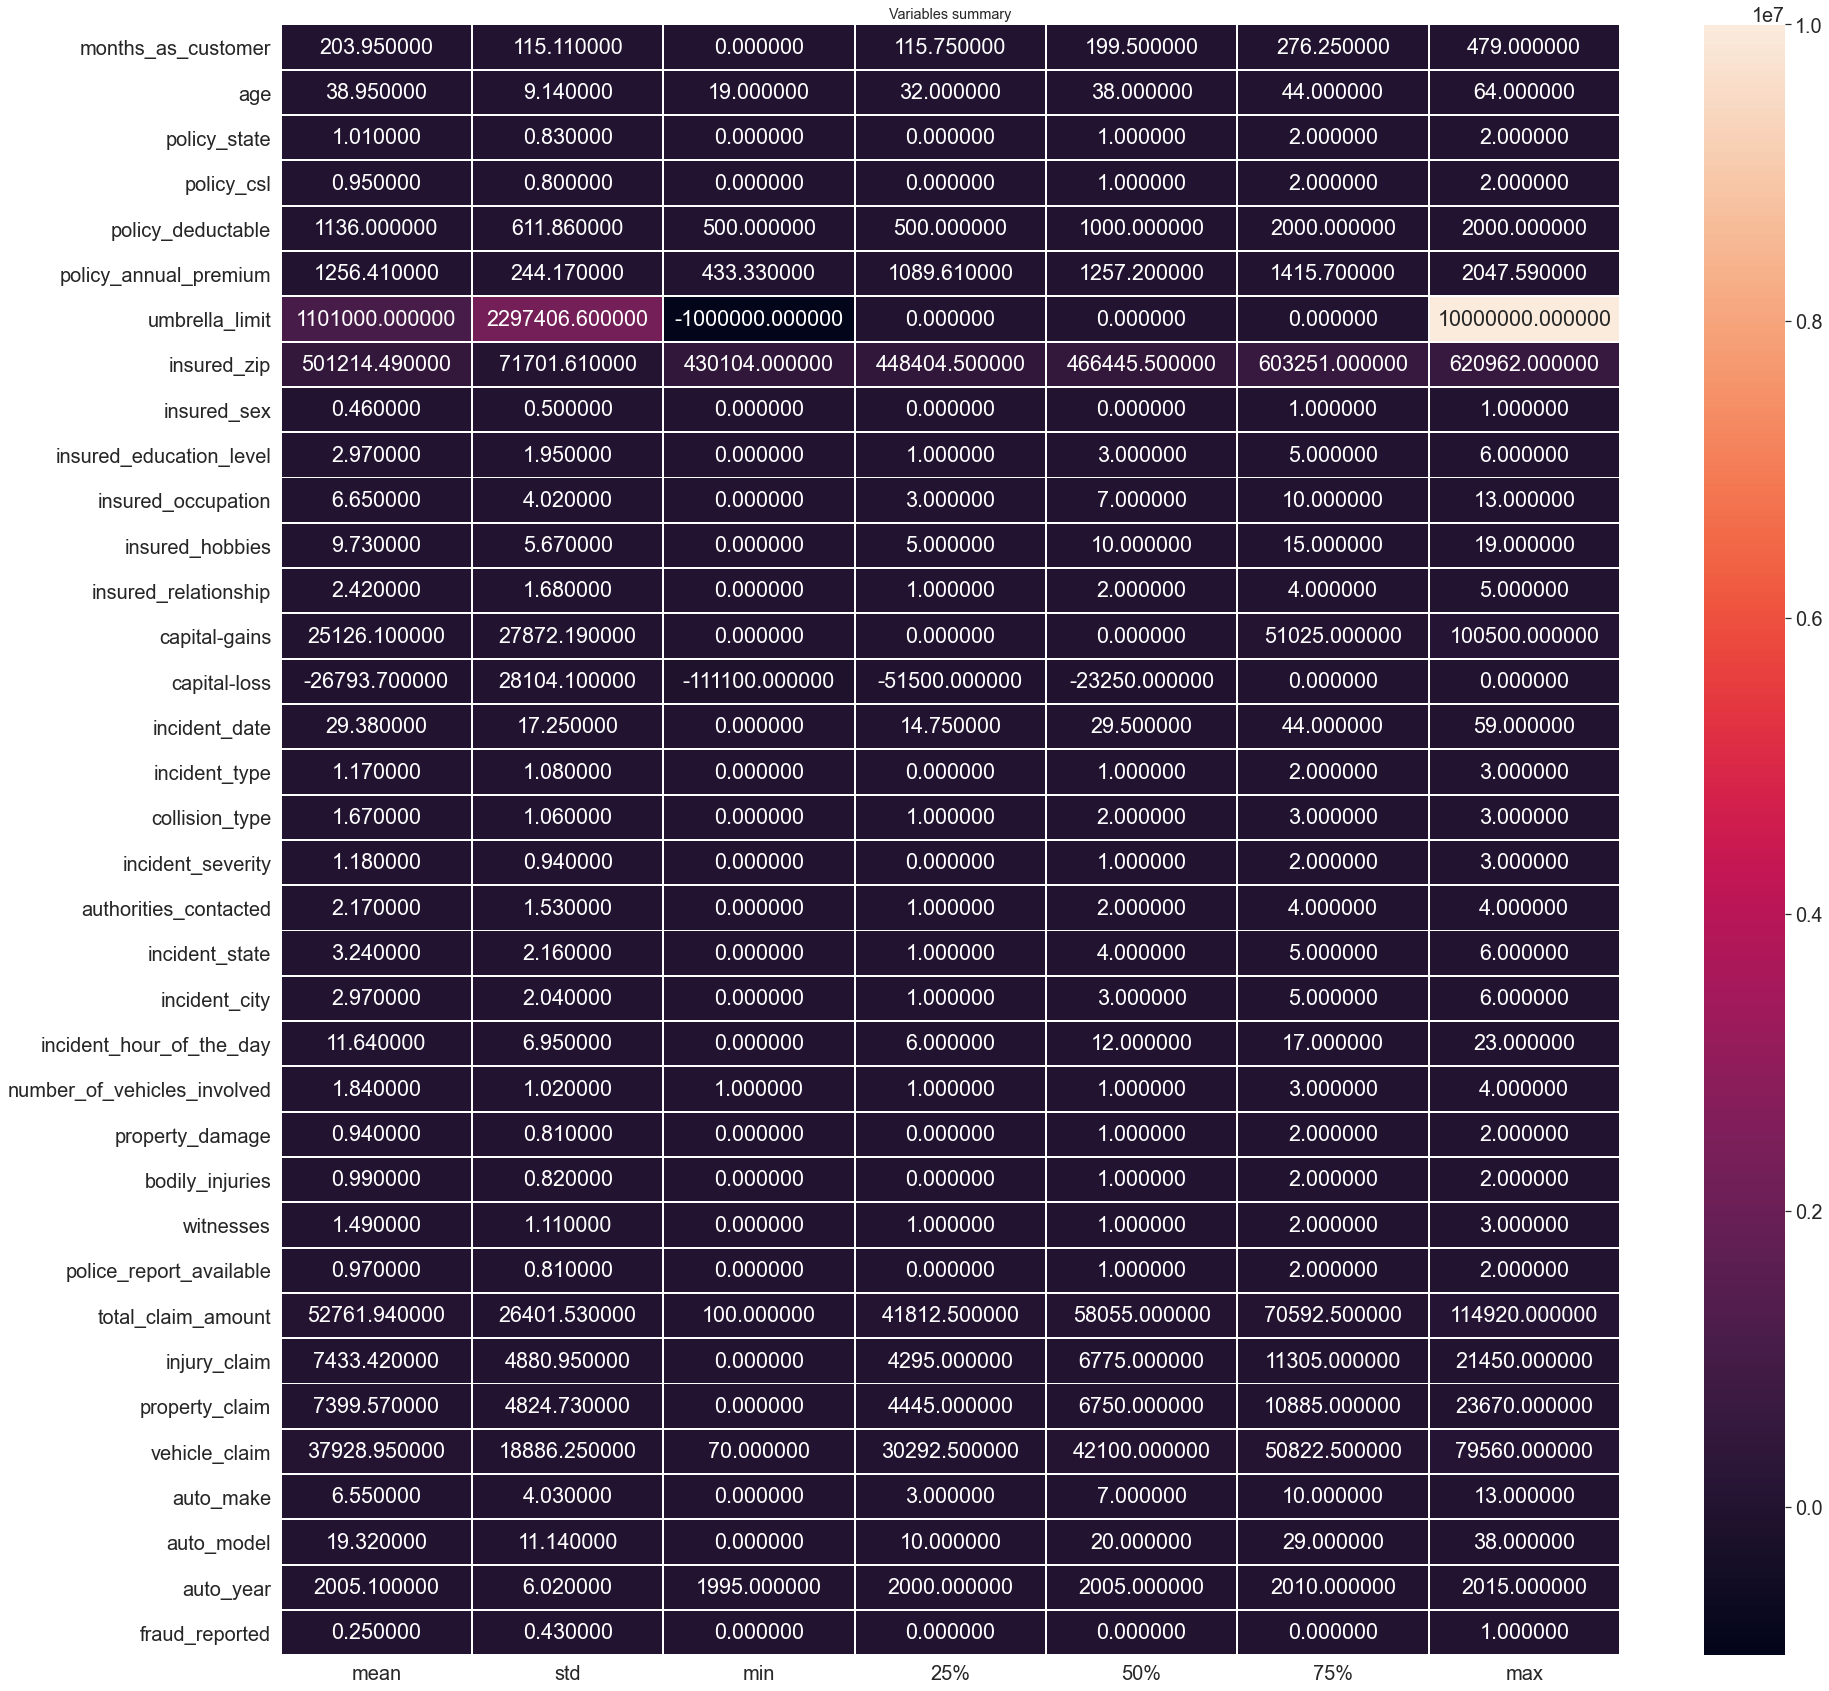

In [174]:
plt.figure(figsize=(30,30))
sns.heatmap(round(df.describe()[1:].transpose(),2),linewidth=1,annot=True,fmt="f")
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
sns.set(font_scale=1.2)
plt.title("Variables summary")
plt.show()


Observations:
    
    1.From above plotting we can find mean,std,min,25%,50%,75% and max data of the following dataset.
    

# Principal component analysis
Principal component analysis (PCA) is the process of computing the principal components. and cheak the collinearity.

In [175]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [176]:
x=df.drop('fraud_reported', axis=1)

In [177]:
x.shape

(1000, 35)

In [178]:
x

months_as_customer  age  policy_state  policy_csl  policy_deductable  \
0                   328   48             2           1               1000   
1                   228   42             1           1               2000   
2                   134   29             2           0               2000   
3                   256   41             0           1               2000   
4                   228   44             0           2               1000   
..                  ...  ...           ...         ...                ...   
995                   3   38             2           2               1000   
996                 285   41             0           0               1000   
997                 130   34             2           1                500   
998                 458   62             0           2               2000   
999                 456   60             2           1               1000   

     policy_annual_premium  umbrella_limit  insured_zip  insured_sex  \
0                  1406.91               0       466132            1   
1                  1197.22         5000000       468176            1   
2                  1413.14         5000000       430632            0   
3                  1415.74         6000000       608117            0   
4                  1583.91         6000000       610706            1   
..                     ...             ...          ...          ...   
995                1310.80               0       431289            0   
996                1436.79               0       608177            0   
997                1383.49         3000000       442797            0   
998                1356.92         5000000       441714            1   
999                 766.19               0       612260            0   

     insured_education_level  ...  bodily_injuries  witnesses  \
0                          4  ...                1          2   
1                          4  ...                0          0   
2                          6  ...                2          3   
3                          6  ...                1          2   
4                          0  ...                0          1   
..                       ...  ...              ...        ...   
995                        5  ...                0          1   
996                        6  ...                2          3   
997                        5  ...                2          3   
998                        0  ...                0          1   
999                        0  ...                0          3   

     police_report_available  total_claim_amount  injury_claim  \
0                          2               71610          6510   
1                          0                5070           780   
2                          1               34650          7700   
3                          1               63400          6340   
4                          1                6500          1300   
..                       ...                 ...           ...   
995                        0               87200         17440   
996                        0              108480         18080   
997                        2               67500          7500   
998                        2               46980          5220   
999                        0                5060           460   

     property_claim  vehicle_claim  auto_make  auto_model  auto_year  
0             13020          52080         10           1       2004  
1               780           3510          8          12       2007  
2              3850          23100          4          30       2007  
3              6340          50720          3          34       2014  
4               650           4550          0          31       2009  
..              ...            ...        ...         ...        ...  
995            8720          61040          6           6       2006  
996           18080          72320         13          28       2015  
99

In [179]:
y=df["fraud_reported"]

In [180]:
y

0      1
1      1
2      0
3      1
4      0
      ..
995    0
996    0
997    0
998    0
999    0
Name: fraud_reported, Length: 1000, dtype: int32

In [181]:
def vif_calc():
    vif=pd.DataFrame()
    vif["VIF Factor"]=[variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
    vif["features"]=x.columns
    print(vif)

In [182]:
vif_calc()

    VIF Factor                     features
0    28.313867           months_as_customer
1   131.366147                          age
2     2.569175                 policy_state
3     2.456843                   policy_csl
4     4.615717            policy_deductable
5    28.524926        policy_annual_premium
6     1.266006               umbrella_limit
7    51.392024                  insured_zip
8     1.909893                  insured_sex
9     3.438135      insured_education_level
10    3.814031           insured_occupation
11    4.135153              insured_hobbies
12    3.219622         insured_relationship
13    1.877007                capital-gains
14    1.980535                 capital-loss
15    4.006097                incident_date
16   11.063295                incident_type
17    5.935303               collision_type
18    3.123394            incident_severity
19    3.205210        authorities_contacted
20    3.400689               incident_state
21    3.167385                in

In [183]:
df1 = df.drop(['auto_model'], axis=1)

Observations:
    
    1.we find it right some columns are collinear with each other..
    

# Checking the Correlation Matrix

<AxesSubplot:>

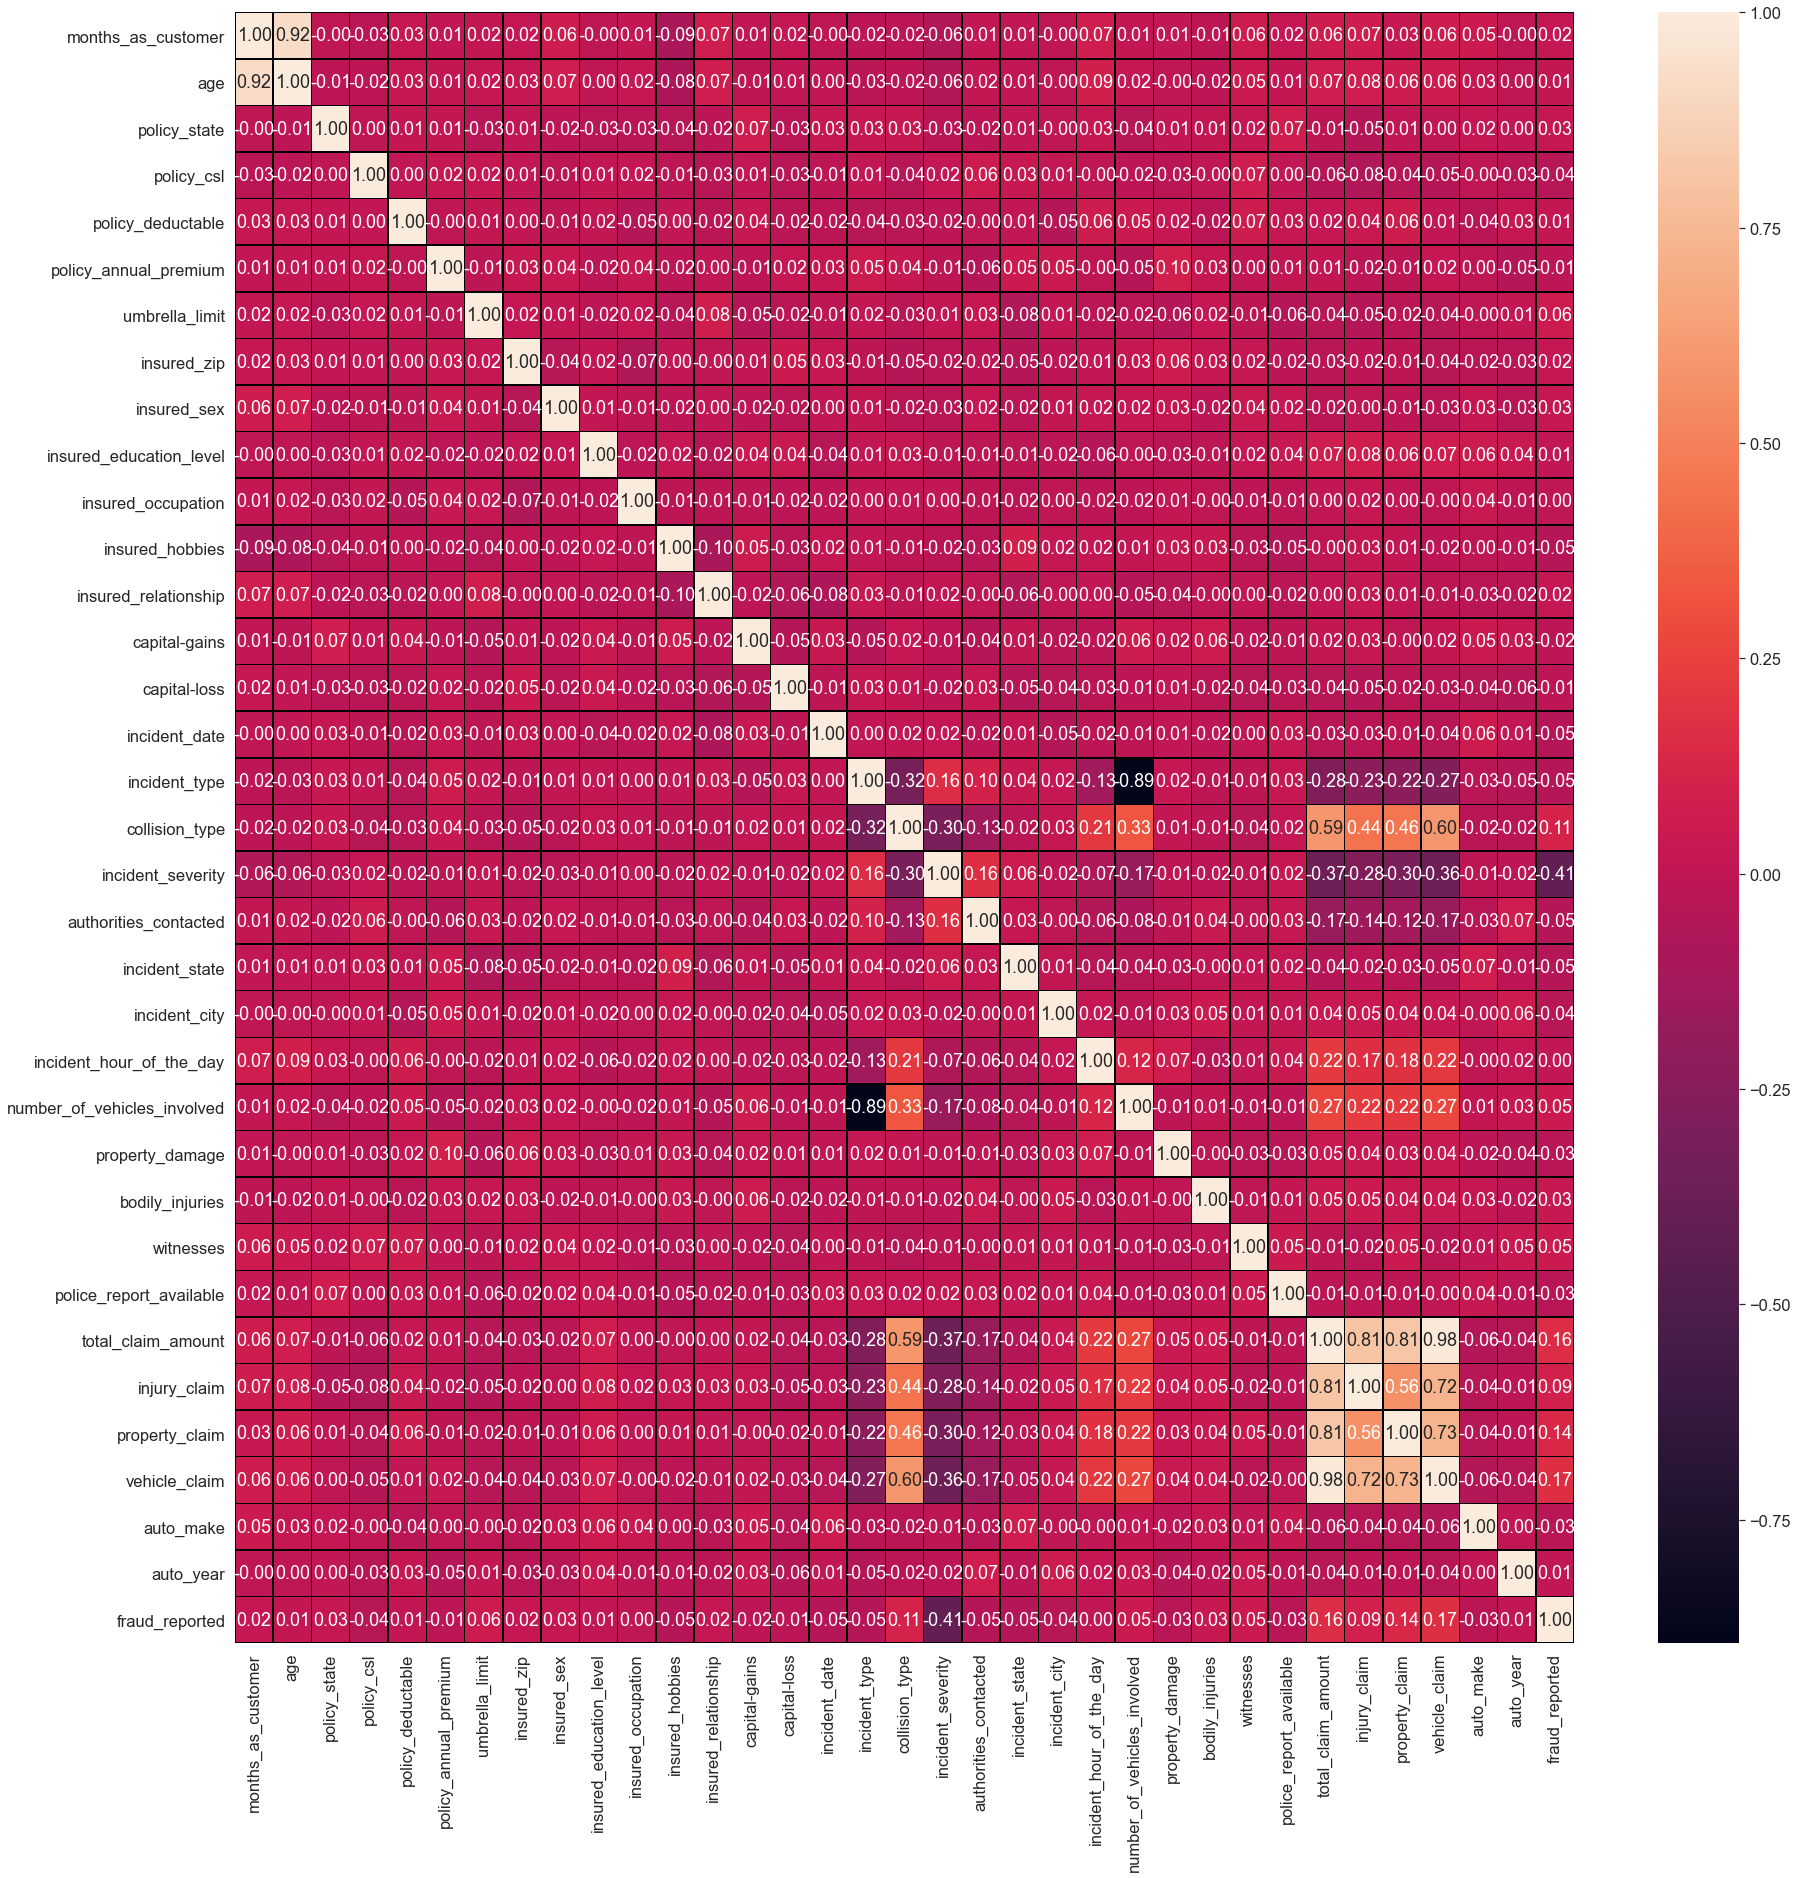

In [186]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(30,30))
sns.set(font_scale=1.5)
sns.heatmap(df1.corr(), annot=True, linewidths=0.5,linecolor="black", fmt= '.2f')

In [187]:
x=df1.drop('fraud_reported', axis=1)

In [188]:
def vif_calc():
    vif=pd.DataFrame()
    vif["VIF Factor"]=[variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
    vif["features"]=x.columns
    print(vif)

In [189]:
vif_calc()

    VIF Factor                     features
0    28.307100           months_as_customer
1   131.287787                          age
2     2.568404                 policy_state
3     2.450811                   policy_csl
4     4.615404            policy_deductable
5    28.506985        policy_annual_premium
6     1.264899               umbrella_limit
7    51.363941                  insured_zip
8     1.909617                  insured_sex
9     3.428173      insured_education_level
10    3.811328           insured_occupation
11    4.129795              insured_hobbies
12    3.209510         insured_relationship
13    1.873590                capital-gains
14    1.977017                 capital-loss
15    4.004540                incident_date
16   11.058134                incident_type
17    5.931015               collision_type
18    3.119127            incident_severity
19    3.203825        authorities_contacted
20    3.398213               incident_state
21    3.166677                in

array([[<AxesSubplot:title={'center':'months_as_customer'}>,
        <AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'policy_state'}>,
        <AxesSubplot:title={'center':'policy_csl'}>,
        <AxesSubplot:title={'center':'policy_deductable'}>,
        <AxesSubplot:title={'center':'policy_annual_premium'}>],
       [<AxesSubplot:title={'center':'umbrella_limit'}>,
        <AxesSubplot:title={'center':'insured_zip'}>,
        <AxesSubplot:title={'center':'insured_sex'}>,
        <AxesSubplot:title={'center':'insured_education_level'}>,
        <AxesSubplot:title={'center':'insured_occupation'}>,
        <AxesSubplot:title={'center':'insured_hobbies'}>],
       [<AxesSubplot:title={'center':'insured_relationship'}>,
        <AxesSubplot:title={'center':'capital-gains'}>,
        <AxesSubplot:title={'center':'capital-loss'}>,
        <AxesSubplot:title={'center':'incident_date'}>,
        <AxesSubplot:title={'center':'incident_type'}>,
        <AxesSubplot:ti

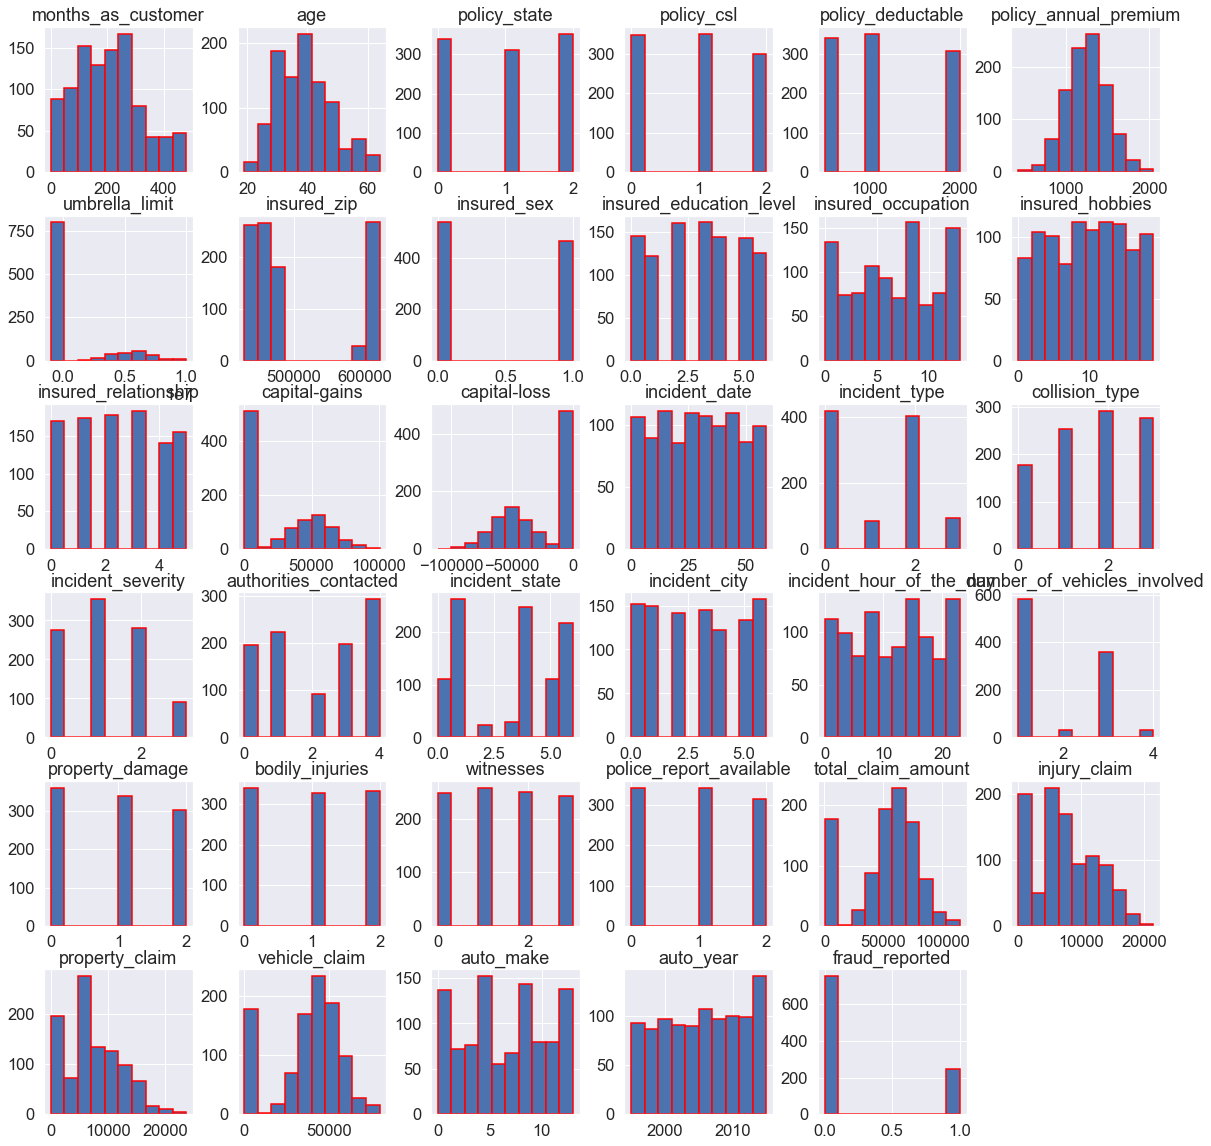

In [190]:
df1.hist(edgecolor='red',linewidth=1.5,figsize=(20,20))

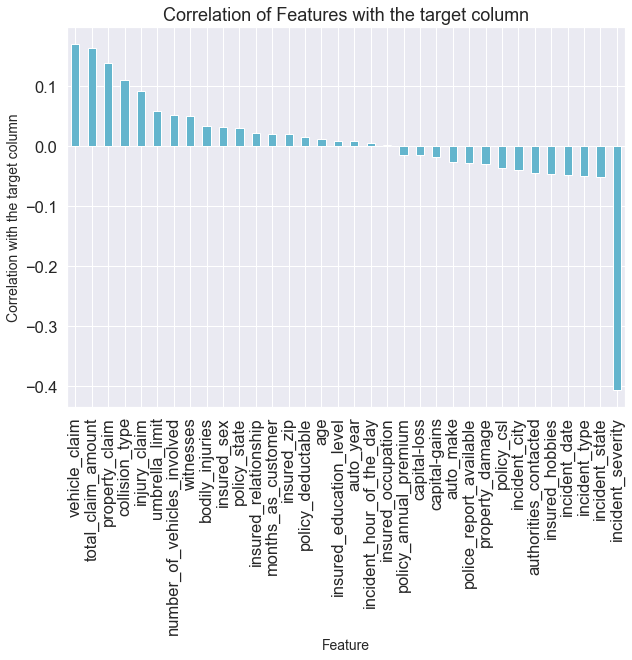

In [191]:
plt.figure(figsize=(10,7))
df1.corr()['fraud_reported'].sort_values(ascending=False).drop(['fraud_reported']).plot(kind='bar',color='c')
plt.xlabel('Feature',fontsize=14)
plt.ylabel('Correlation with the target column',fontsize=14)
plt.title('Correlation of Features with the target column',fontsize=18)
plt.show()

observations:
    
    1.incident_severity making negative impact on target columns.

# Cheak the skewness:

 Now use subplot and displot to check data are normalised or not.

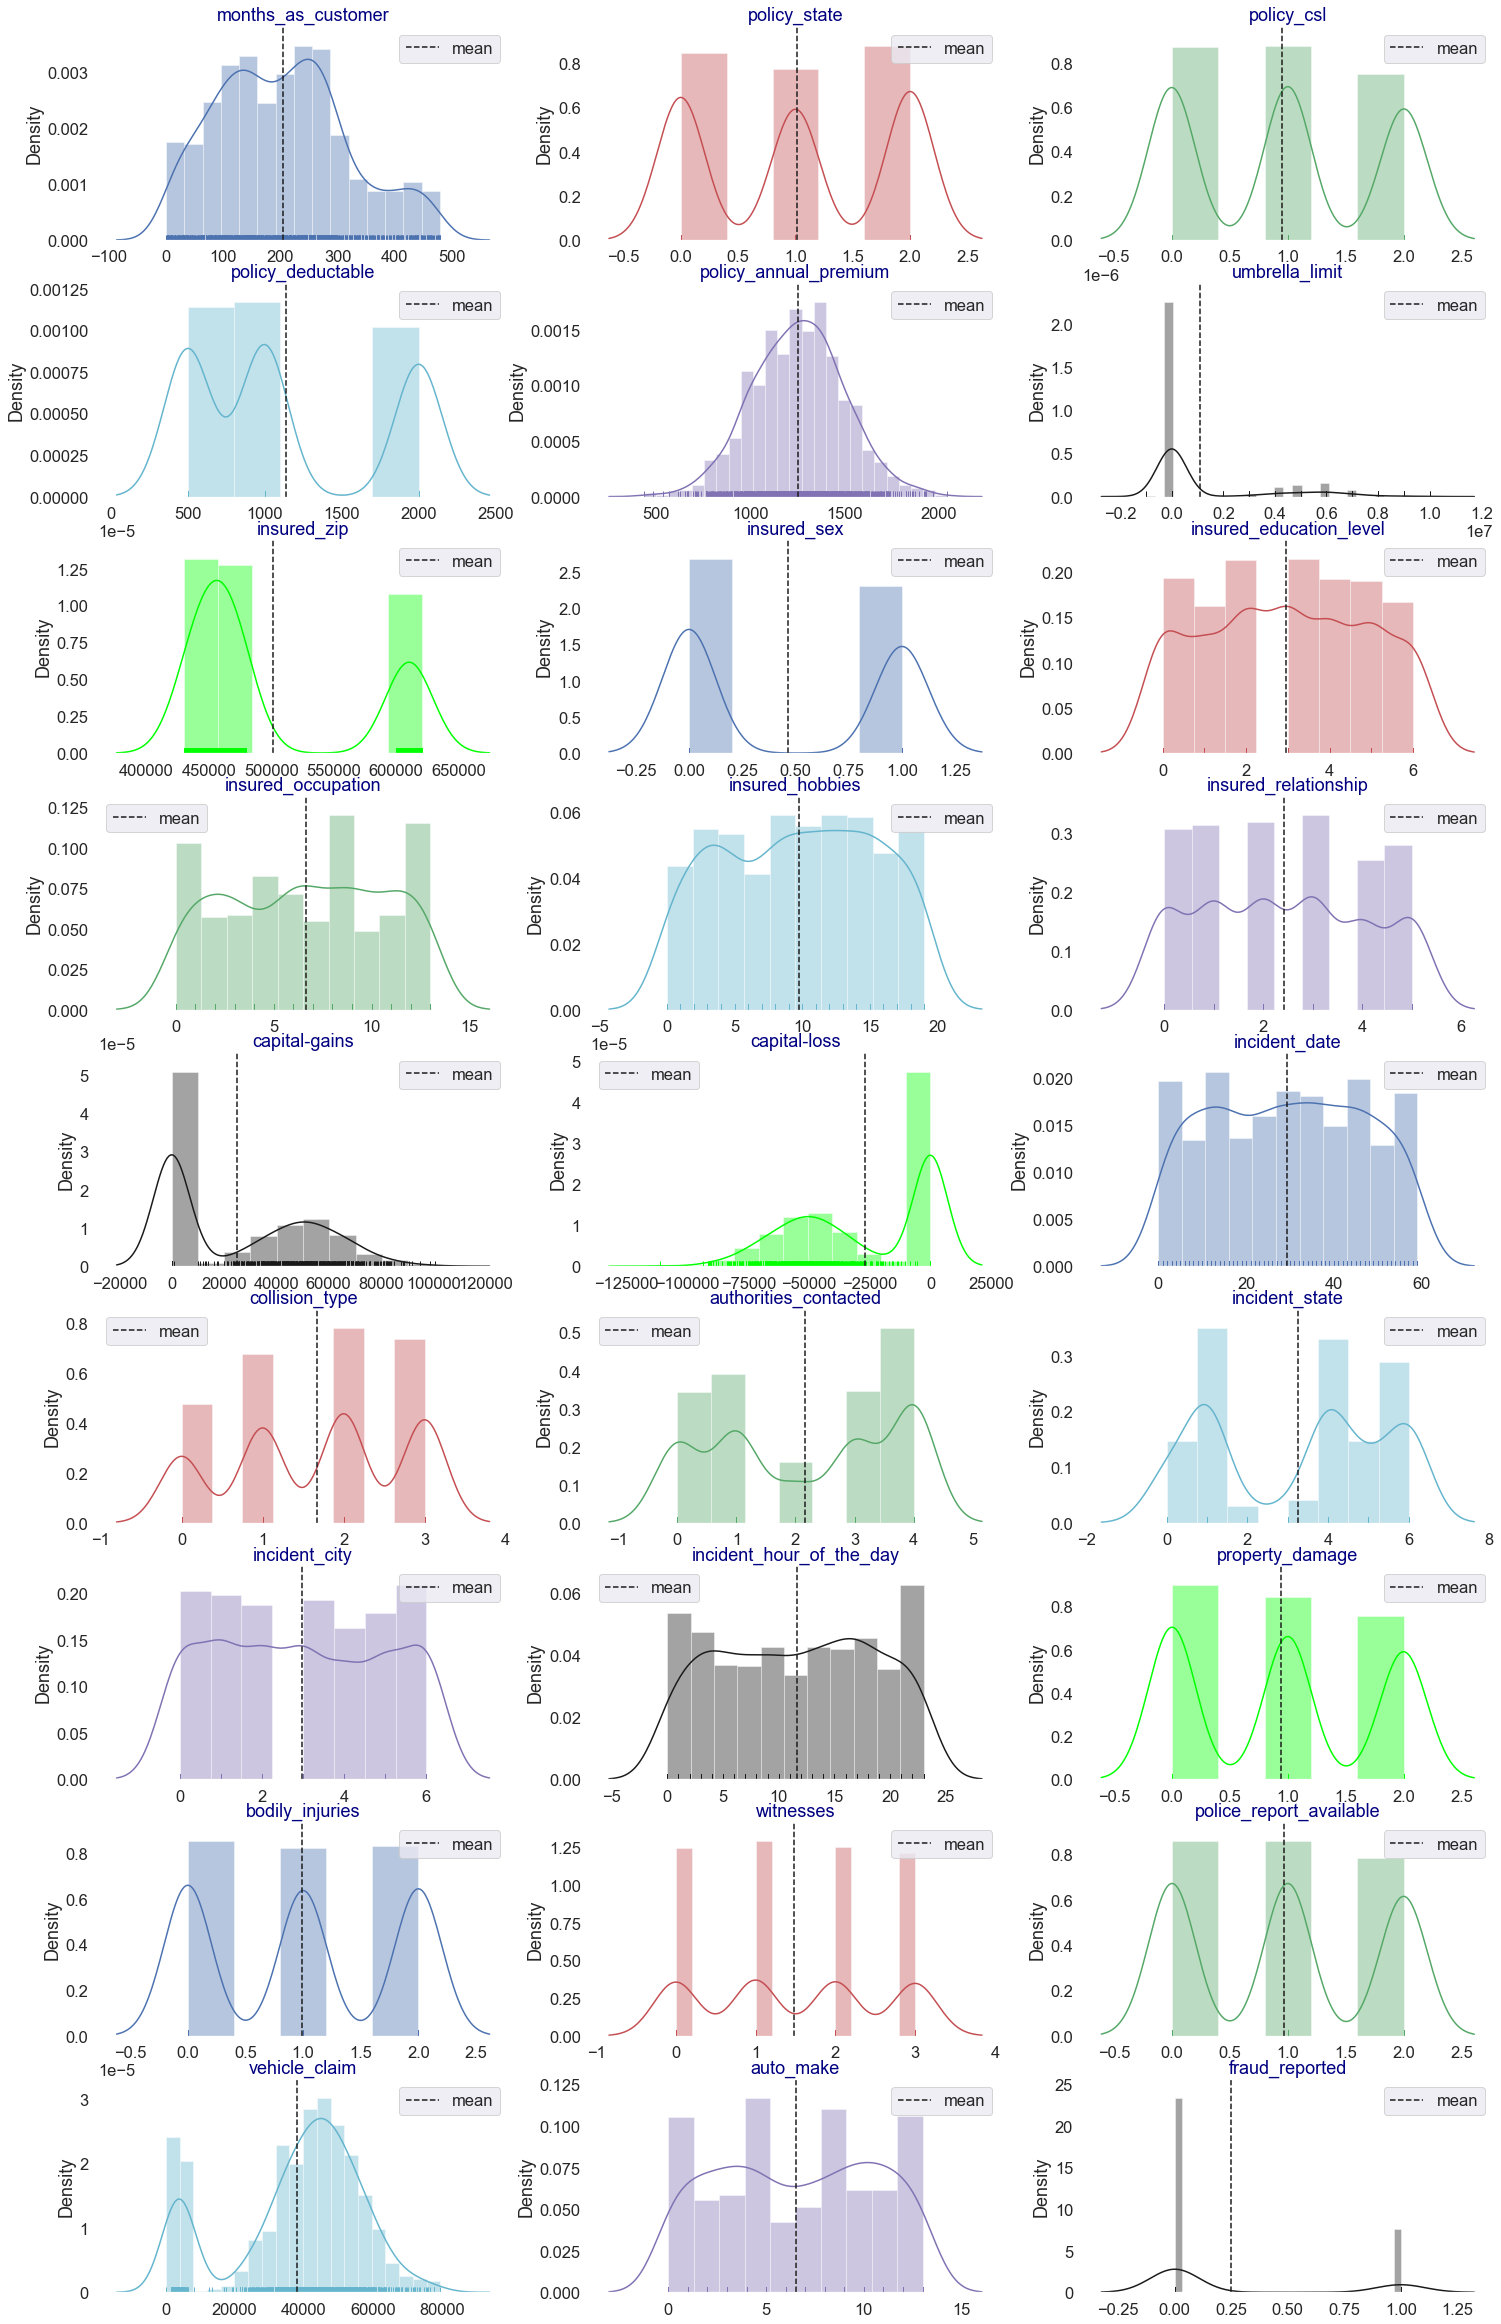

In [197]:
import itertools
import matplotlib.pyplot as plt
cols = ['months_as_customer', 'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'collision_type', 'authorities_contacted',
       'incident_state', 'incident_city', 'incident_hour_of_the_day',
       'property_damage', 'bodily_injuries', 'witnesses',
       'police_report_available', 'vehicle_claim', 'auto_make',
       'fraud_reported']
length = len(cols)
cs = ["b","r","g","c","m","k",'lime',"b","r","g","c","m","k",'lime',"b","r","g","c","m","k",'lime',"b","r","g","c","m","k"]
fig = plt.figure(figsize=(25,70))

for i,j,k in itertools.zip_longest(cols,range(length),cs):
    plt.subplot(15,3,j+1)
    ax = sns.distplot(df1[i],color=k,rug=True)
    ax.set_facecolor("w")
    plt.axvline(df1[i].mean(),linestyle="dashed",label="mean",color="k")
    plt.legend(loc="best")
    plt.title(i,color="navy")
    plt.xlabel("")

In [198]:
df1.skew()

months_as_customer             0.362177
age                            0.478988
policy_state                  -0.026177
policy_csl                     0.088928
policy_deductable              0.477887
policy_annual_premium          0.004402
umbrella_limit                 1.806712
insured_zip                    0.816554
insured_sex                    0.148630
insured_education_level       -0.000148
insured_occupation            -0.058881
insured_hobbies               -0.061563
insured_relationship           0.077488
capital-gains                  0.478850
capital-loss                  -0.391472
incident_date                  0.004756
incident_type                  0.101507
collision_type                -0.193345
incident_severity              0.279016
authorities_contacted         -0.121744
incident_state                -0.148865
incident_city                  0.049531
incident_hour_of_the_day      -0.035584
number_of_vehicles_involved    0.502664
property_damage                0.106418


# Detecting outliers:

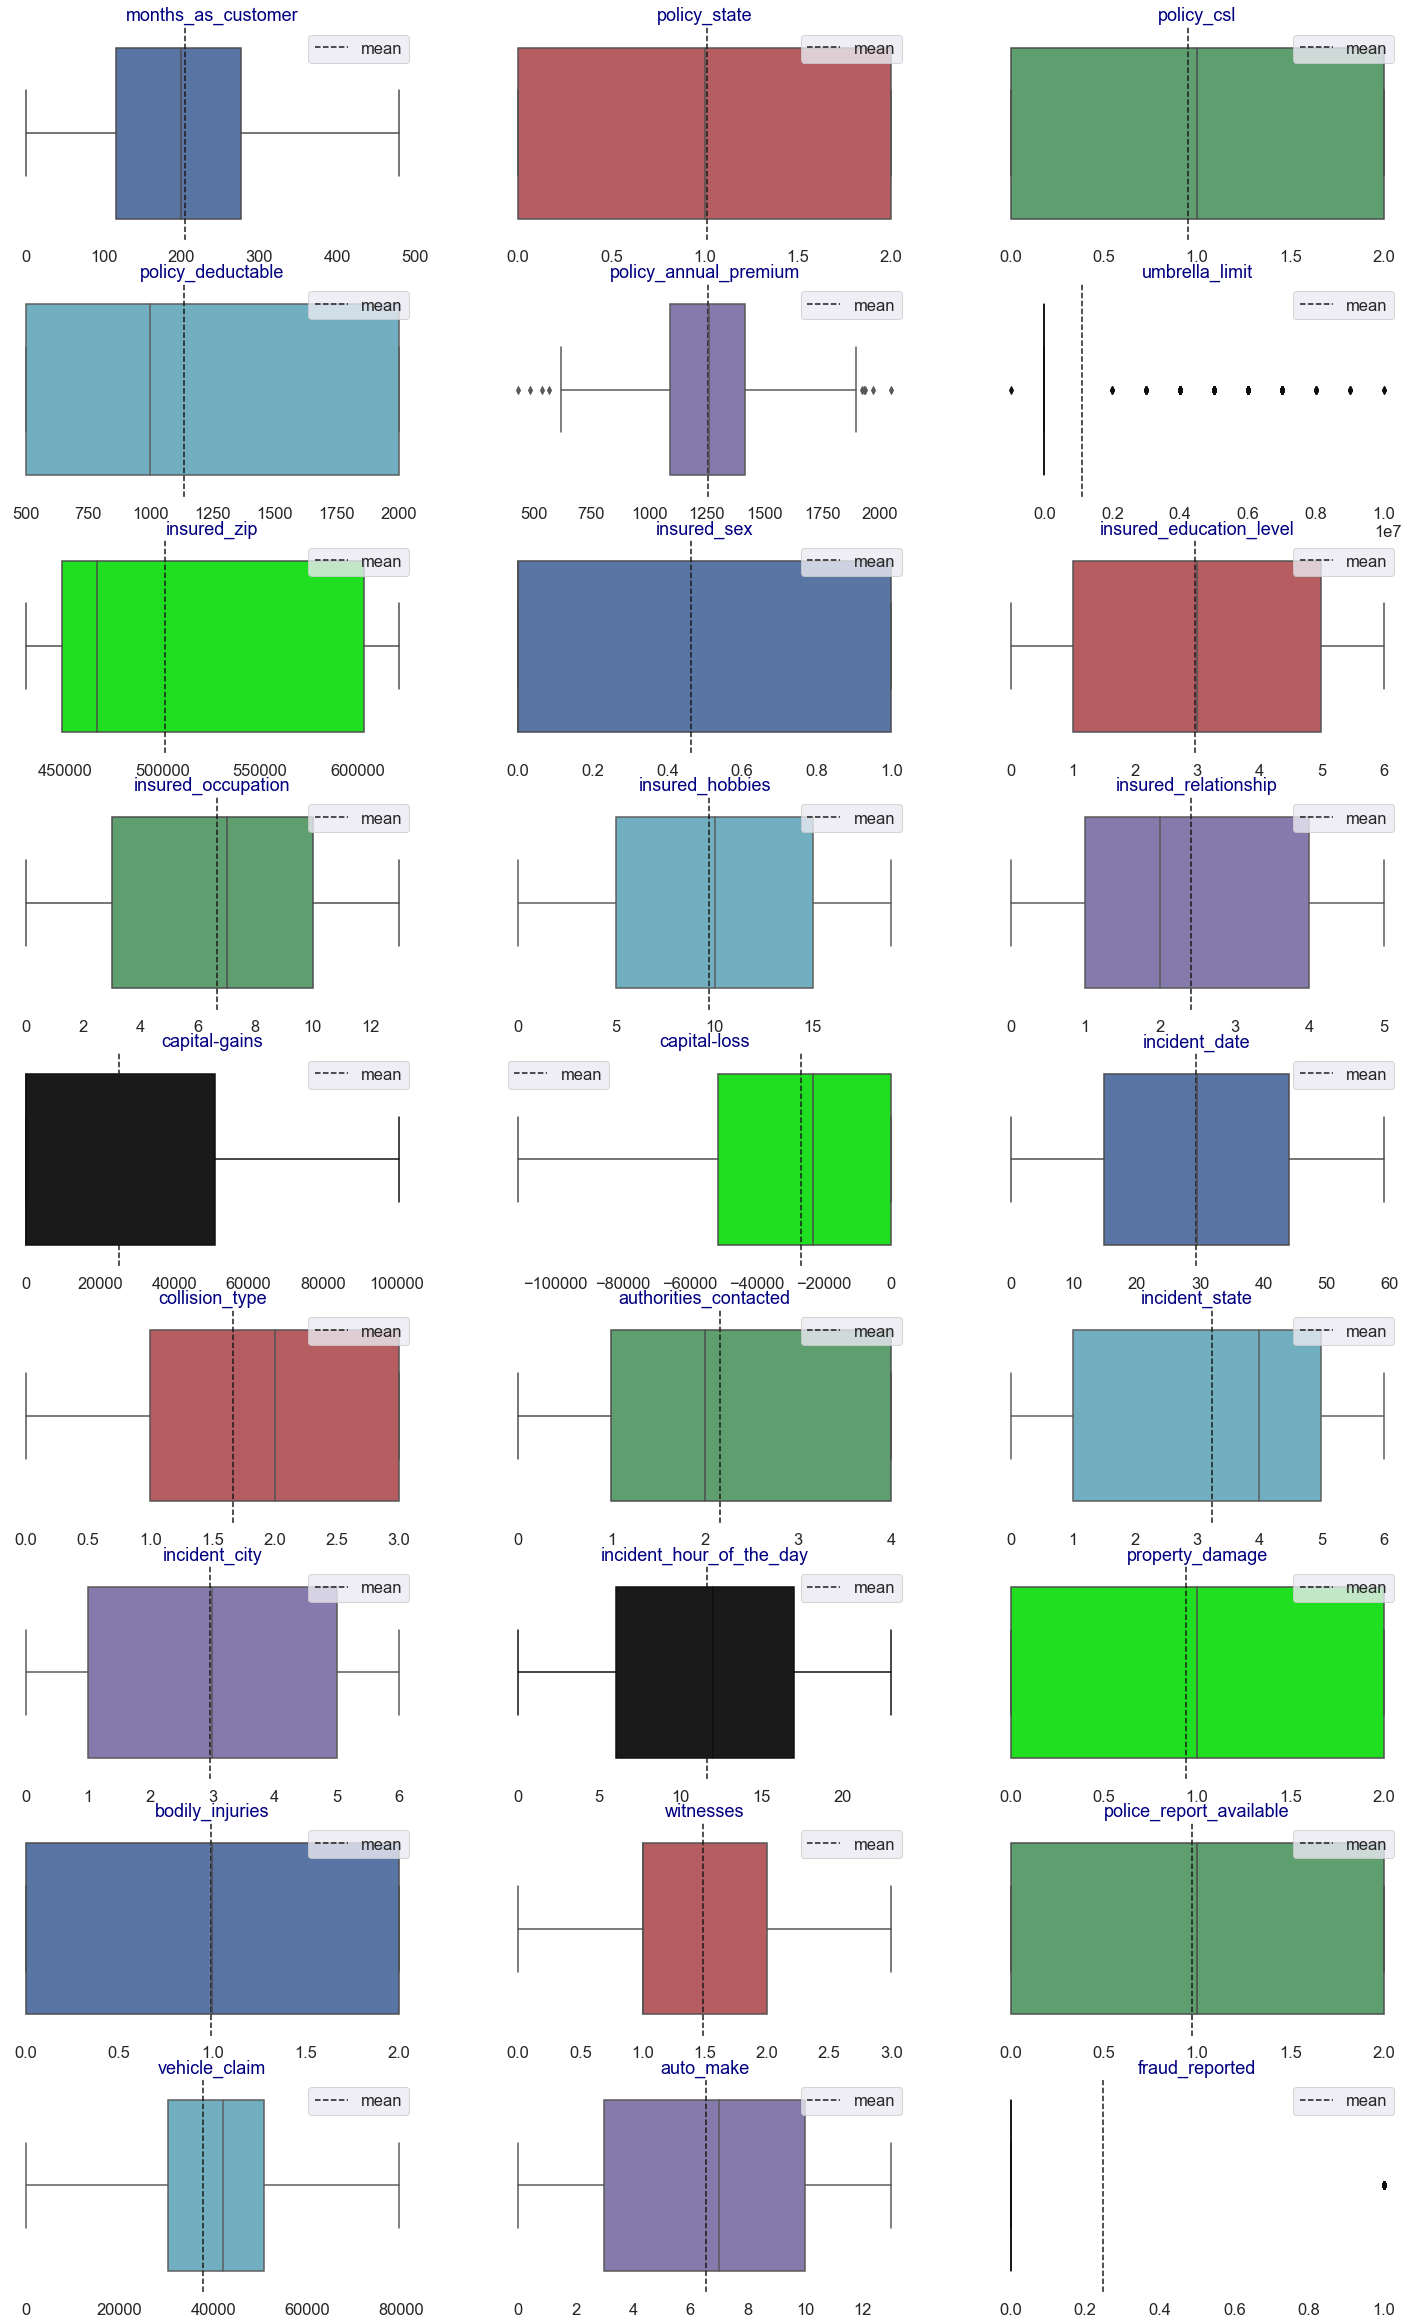

In [195]:
import itertools
import matplotlib.pyplot as plt
cols = ['months_as_customer', 'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'collision_type', 'authorities_contacted',
       'incident_state', 'incident_city', 'incident_hour_of_the_day',
       'property_damage', 'bodily_injuries', 'witnesses',
       'police_report_available', 'vehicle_claim', 'auto_make', 
       'fraud_reported']
length = len(cols)
cs = ["b","r","g","c","m","k",'lime',"b","r","g","c","m","k",'lime',"b","r","g","c","m","k",'lime',"b","r","g","c","m","k"]
fig = plt.figure(figsize=(25,70))

for i,j,k in itertools.zip_longest(cols,range(length),cs):
    plt.subplot(15,3,j+1)
    ax = sns.boxplot(df1[i],color=k)
    ax.set_facecolor("w")
    plt.axvline(df1[i].mean(),linestyle="dashed",label="mean",color="k")
    plt.legend(loc="best")
    plt.title(i,color="navy")
    plt.xlabel("")

Observations:
    
    1. not much outliers are present.

# Check the percentage of data falls under outliers:

In [199]:
from scipy.stats import zscore
import numpy as np
z=np.abs(zscore(df1))
threshold=3
np.where(z>3)

(array([ 31,  48,  88, 115, 119, 229, 248, 262, 314, 430, 458, 500, 503,
        657, 700, 763, 807, 875, 922, 975], dtype=int64),
 array([ 6,  6,  6,  6,  6,  5,  5,  6,  6,  6,  6, 30,  6,  6,  6,  5, 14,
         6,  6,  6], dtype=int64))

In [200]:
df_new=df1[(z<3).all(axis=1)]
df_new

months_as_customer  age  policy_state  policy_csl  policy_deductable  \
0                   328   48             2           1               1000   
1                   228   42             1           1               2000   
2                   134   29             2           0               2000   
3                   256   41             0           1               2000   
4                   228   44             0           2               1000   
..                  ...  ...           ...         ...                ...   
995                   3   38             2           2               1000   
996                 285   41             0           0               1000   
997                 130   34             2           1                500   
998                 458   62             0           2               2000   
999                 456   60             2           1               1000   

     policy_annual_premium  umbrella_limit  insured_zip  insured_sex  \
0                  1406.91               0       466132            1   
1                  1197.22         5000000       468176            1   
2                  1413.14         5000000       430632            0   
3                  1415.74         6000000       608117            0   
4                  1583.91         6000000       610706            1   
..                     ...             ...          ...          ...   
995                1310.80               0       431289            0   
996                1436.79               0       608177            0   
997                1383.49         3000000       442797            0   
998                1356.92         5000000       441714            1   
999                 766.19               0       612260            0   

     insured_education_level  ...  bodily_injuries  witnesses  \
0                          4  ...                1          2   
1                          4  ...                0          0   
2                          6  ...                2          3   
3                          6  ...                1          2   
4                          0  ...                0          1   
..                       ...  ...              ...        ...   
995                        5  ...                0          1   
996                        6  ...                2          3   
997                        5  ...                2          3   
998                        0  ...                0          1   
999                        0  ...                0          3   

     police_report_available  total_claim_amount  injury_claim  \
0                          2               71610          6510   
1                          0                5070           780   
2                          1               34650          7700   
3                          1               63400          6340   
4                          1                6500          1300   
..                       ...                 ...           ...   
995                        0               87200         17440   
996                        0              108480         18080   
997                        2               67500          7500   
998                        2               46980          5220   
999                        0                5060           460   

     property_claim  vehicle_claim  auto_make  auto_year  fraud_reported  
0             13020          52080         10       2004               1  
1               780           3510          8       2007               1  
2              3850          23100          4       2007               0  
3              6340          50720          3       2014               1  
4               650           4550          0       2009               0  
..              ...            ...        ...        ...             ...  
995            8720          61040          6       2006               0  
996           18080          72320       

In [201]:
df1.shape

(1000, 35)

In [202]:
df_new.shape

(980, 35)

In [203]:
percentage_loss=((1000-980)/980)*100
print(percentage_loss)

2.0408163265306123


# Split the dataset in input columns and target columns..

Split the dataset in input columns and target columns..

In [204]:
y=df_new['fraud_reported']

In [205]:
x=df_new.drop('fraud_reported', axis=1)

# Removing skewness by transforming data.

In [206]:
from sklearn.preprocessing import power_transform
x=power_transform(x,method='yeo-johnson')
x

array([[ 1.04454111,  1.0023305 ,  1.14147704, ...,  0.7581298 ,
         0.85481164, -0.20443508],
       [ 0.29904549,  0.42717141,  0.05900219, ..., -1.78748531,
         0.41187331,  0.29587688],
       [-0.51581942, -1.13601305,  1.14147704, ..., -0.82024583,
        -0.56458381,  0.29587688],
       ...,
       [-0.55427228, -0.47059792,  1.14147704, ...,  0.78172811,
         1.06823592, -1.49935977],
       [ 1.90408801,  2.12107486, -1.26576425, ..., -0.10201672,
        -1.44793034, -1.18090064],
       [ 1.89156317,  1.97656406,  1.14147704, ..., -1.77993883,
         0.41187331,  0.29587688]])

In [207]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(x)
x

array([[ 1.04454111,  1.0023305 ,  1.14147704, ...,  0.7581298 ,
         0.85481164, -0.20443508],
       [ 0.29904549,  0.42717141,  0.05900219, ..., -1.78748531,
         0.41187331,  0.29587688],
       [-0.51581942, -1.13601305,  1.14147704, ..., -0.82024583,
        -0.56458381,  0.29587688],
       ...,
       [-0.55427228, -0.47059792,  1.14147704, ...,  0.78172811,
         1.06823592, -1.49935977],
       [ 1.90408801,  2.12107486, -1.26576425, ..., -0.10201672,
        -1.44793034, -1.18090064],
       [ 1.89156317,  1.97656406,  1.14147704, ..., -1.77993883,
         0.41187331,  0.29587688]])

# Since the column has binary variable we will use logistic classification model
Regressor Model Building:

Logistic Regression:

In [208]:
df_new.fraud_reported.value_counts()

0    740
1    240
Name: fraud_reported, dtype: int64

In [209]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression


lr=LogisticRegression()
from sklearn.metrics import accuracy_score

In [210]:
from imblearn.over_sampling import SMOTE

In [211]:
smt=SMOTE()
x_train,y_train=smt.fit_resample(x,y)

In [212]:
np.bincount(y)

array([740, 240], dtype=int64)

In [213]:
y_train.value_counts()

1    740
0    740
Name: fraud_reported, dtype: int64

In [214]:
for i in range(0,1000):
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=i,test_size=0.20)
    lr.fit(x_train,y_train)
    pred_train=lr.predict(x_train)
    pred_test=lr.predict(x_test)
    if round(accuracy_score(y_train,pred_train)*100,1)==round(accuracy_score(y_test,pred_test)*100,1):
        print("At random state",i," The model performs very well")
        print("At random_state:-",i)
        print("Training accuracy_score is:-", accuracy_score(y_train,pred_train)*100)
        print("Testing accuracy_score is:-", accuracy_score(y_test,pred_test)*100)

At random state 74  The model performs very well
At random_state:- 74
Training accuracy_score is:- 81.12244897959184
Testing accuracy_score is:- 81.12244897959184
At random state 97  The model performs very well
At random_state:- 97
Training accuracy_score is:- 80.10204081632652
Testing accuracy_score is:- 80.10204081632652
At random state 152  The model performs very well
At random_state:- 152
Training accuracy_score is:- 79.59183673469387
Testing accuracy_score is:- 79.59183673469387
At random state 212  The model performs very well
At random_state:- 212
Training accuracy_score is:- 80.61224489795919
Testing accuracy_score is:- 80.61224489795919
At random state 336  The model performs very well
At random_state:- 336
Training accuracy_score is:- 80.10204081632652
Testing accuracy_score is:- 80.10204081632652
At random state 434  The model performs very well
At random_state:- 434
Training accuracy_score is:- 79.59183673469387
Testing accuracy_score is:- 79.59183673469387
At random stat

At random state 476  The model performs very well
At random_state:- 476
Training accuracy_score is:- 81.12244897959184
Testing accuracy_score is:- 81.12244897959184

In [227]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=476,test_size=0.20)

In [228]:
x_train.shape

(784, 34)

In [229]:
y_train.shape

(784,)

In [230]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=476,test_size=0.20)
lr=LogisticRegression()
lr.fit(x_train,y_train)
lr.score(x_train,y_train)

pred_test=lr.predict(x_test)

from sklearn.metrics import accuracy_score
accuracy_score(y_test,pred_test)

0.8112244897959183

In [231]:
print('Error:')

print('Mean Absolute Error:',mean_absolute_error(y_test,pred_test))
print('Mean Squared Error:',mean_squared_error(y_test,pred_test))
print('Root Mean Square Error:',np.sqrt(mean_squared_error(y_test,pred_test)))


Error:
Mean Absolute Error: 0.18877551020408162
Mean Squared Error: 0.18877551020408162
Root Mean Square Error: 0.4344830378784442


In [232]:
from sklearn.metrics import classification_report
print(classification_report(y_test,pred_test))

              precision    recall  f1-score   support

           0       0.85      0.91      0.88       151
           1       0.62      0.47      0.53        45

    accuracy                           0.81       196
   macro avg       0.73      0.69      0.71       196
weighted avg       0.80      0.81      0.80       196



In [233]:
pred_lr=lr.predict(x_test)
from sklearn.model_selection import cross_val_score
lrs=accuracy_score (y_test,pred_lr)
for j in range(2,10):
    lsscore=cross_val_score(lr,x,y,cv=j)
    lsc=lsscore.mean()
    print("At cv:-", j)
    print("Cross validation score is :-",lsc*100)
    print("accuracy_score is :-",lrs*100)
    print("\n")

At cv:- 2
Cross validation score is :- 77.14285714285715
accuracy_score is :- 81.12244897959184


At cv:- 3
Cross validation score is :- 76.63427202741663
accuracy_score is :- 81.12244897959184


At cv:- 4
Cross validation score is :- 78.0612244897959
accuracy_score is :- 81.12244897959184


At cv:- 5
Cross validation score is :- 77.75510204081633
accuracy_score is :- 81.12244897959184


At cv:- 6
Cross validation score is :- 78.26387849768068
accuracy_score is :- 81.12244897959184


At cv:- 7
Cross validation score is :- 78.26530612244899
accuracy_score is :- 81.12244897959184


At cv:- 8
Cross validation score is :- 77.55064640810342
accuracy_score is :- 81.12244897959184


At cv:- 9
Cross validation score is :- 77.858005814173
accuracy_score is :- 81.12244897959184




At cv:- 9
Cross validation score is :- 77.858005814173
accuracy_score is :- 81.12244897959184

In [234]:
rscore=cross_val_score(lr,x,y,cv=7)
print("Cross validation score is :-",lsc*100)
print("accuracy_score is :-",lrs*100)

Cross validation score is :- 77.858005814173
accuracy_score is :- 81.12244897959184


In [235]:
lrs*100

81.12244897959184

In [236]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
print(confusion_matrix(y_test,pred_test))
print(accuracy_score(y_test,pred_test))
print(classification_report(y_test,pred_test))

[[138  13]
 [ 24  21]]
0.8112244897959183
              precision    recall  f1-score   support

           0       0.85      0.91      0.88       151
           1       0.62      0.47      0.53        45

    accuracy                           0.81       196
   macro avg       0.73      0.69      0.71       196
weighted avg       0.80      0.81      0.80       196



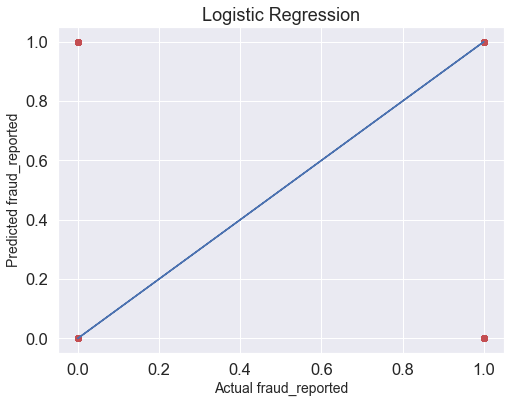

In [237]:
plt.figure(figsize=(8,6))
plt.scatter(x=y_test, y=pred_lr, color='r')
plt.plot(y_test,y_test, color='b')
plt.xlabel('Actual fraud_reported',fontsize=14)
plt.ylabel('Predicted fraud_reported',fontsize=14)
plt.title('Logistic Regression',fontsize=18)
plt.show()

# Regurlarization
As we can easily analyis that data is not correctely fit in our model lets do some regurlization.

In [238]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings('ignore')

# 1. Ridge

In [239]:
from sklearn.linear_model import RidgeClassifier

parameters = {'alpha':[.0001, .001, .01, .1, 1],'fit_intercept':[True,False],'normalize':[True,False],'copy_X':[True,False],'tol':[0.001,0.01,0.1],'random_state':[0,1,2,3,4,5,6,7,8,9]}
rd = RidgeClassifier()
clf = GridSearchCV(rd,parameters)
clf.fit(x_train,y_train)

print(clf.best_params_)

{'alpha': 0.01, 'copy_X': True, 'fit_intercept': True, 'normalize': True, 'random_state': 0, 'tol': 0.001}


In [240]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

rd = RidgeClassifier(alpha=.01, copy_X= True, fit_intercept= True, normalize=True, random_state= 0, tol= 0.001)
rd.fit(x_train,y_train)
rd.score(x_train,y_train)
pred_rd = rd.predict(x_test)
rds = r2_score(y_test,pred_rd)
for j in range(2,10):
    rds = r2_score(y_test,pred_rd)
    
    print("At cv:-",j)
    print('R2 Score:',rds*100)

    rdscore = cross_val_score(rd,x,y,cv=j)
    rdc = rdscore.mean() 
    print('Cross Val Score:',rdc*100)

At cv:- 2
R2 Score: -15.378955114054405
Cross Val Score: 77.04081632653062
At cv:- 3
R2 Score: -15.378955114054405
Cross Val Score: 76.63364664828052
At cv:- 4
R2 Score: -15.378955114054405
Cross Val Score: 77.3469387755102
At cv:- 5
R2 Score: -15.378955114054405
Cross Val Score: 77.55102040816327
At cv:- 6
R2 Score: -15.378955114054405
Cross Val Score: 77.44712953264502
At cv:- 7
R2 Score: -15.378955114054405
Cross Val Score: 76.83673469387755
At cv:- 8
R2 Score: -15.378955114054405
Cross Val Score: 76.93672530987605
At cv:- 9
R2 Score: -15.378955114054405
Cross Val Score: 77.14161664212634


At cv:- 8
R2 Score: -5.277010132912241
Cross Val Score: 77.60000000000001

In [241]:
rscore=cross_val_score(rd,x,y,cv=8)
print("Cross validation score is :-",rds*100)
print("accuracy_score is :-",rdc*100)

Cross validation score is :- -15.378955114054405
accuracy_score is :- 77.14161664212634


In [242]:
print('Error:')

print('Mean Absolute Error:',mean_absolute_error(y_test,pred_rd))
print('Mean Squared Error:',mean_squared_error(y_test,pred_rd))
print('Root Mean Square Error:',np.sqrt(mean_squared_error(y_test,pred_rd)))

Error:
Mean Absolute Error: 0.20408163265306123
Mean Squared Error: 0.20408163265306123
Root Mean Square Error: 0.45175395145262565


In [243]:
print(accuracy_score(y_test,pred_rd))
print(confusion_matrix(y_test,pred_rd))
print(classification_report(y_test,pred_rd))

0.7959183673469388
[[139  12]
 [ 28  17]]
              precision    recall  f1-score   support

           0       0.83      0.92      0.87       151
           1       0.59      0.38      0.46        45

    accuracy                           0.80       196
   macro avg       0.71      0.65      0.67       196
weighted avg       0.78      0.80      0.78       196



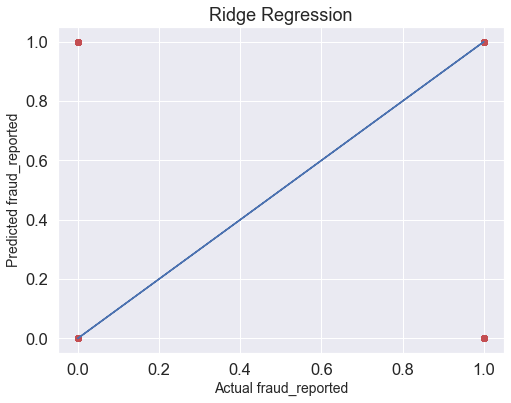

In [244]:
plt.figure(figsize=(8,6))
plt.scatter(x=y_test, y=pred_rd, color='r')
plt.plot(y_test,y_test, color='b')
plt.xlabel('Actual fraud_reported',fontsize=14)
plt.ylabel('Predicted fraud_reported',fontsize=14)
plt.title('Ridge Regression',fontsize=18)
plt.show()

# Ensemble Techniques:
DecisionTreeClassifier

In [245]:
from sklearn.tree import DecisionTreeClassifier

parameters = {'criterion':['gini', 'entropy'], 'splitter':['best', 'random'],'max_features':['auto', 'sqrt', 'log2']}
dt =DecisionTreeClassifier()
clf = GridSearchCV(dt,parameters)
clf.fit(x_train,y_train)

print(clf.best_params_)

{'criterion': 'gini', 'max_features': 'auto', 'splitter': 'best'}


In [246]:
dt = DecisionTreeClassifier(criterion='gini', splitter='best',max_features = 'sqrt')
dt.fit(x_train,y_train)
dt.score(x_train,y_train)
pred_decision = dt.predict(x_test)

dts = r2_score(y_test,pred_decision)
for j in range(2,10):
    print("At cv:-",j)
    dts = r2_score(y_test,pred_decision)
    print('R2 Score:',dts*100)

    dtscore = cross_val_score(dt,x,y,cv=j)
    dtc = dtscore.mean() 
    print('Cross Val Score:',dtc*100)
    print(accuracy_score(y_test,pred_decision))

At cv:- 2
R2 Score: -55.76158940397347
Cross Val Score: 69.48979591836735
0.7244897959183674
At cv:- 3
R2 Score: -55.76158940397347
Cross Val Score: 70.30824937618432
0.7244897959183674
At cv:- 4
R2 Score: -55.76158940397347
Cross Val Score: 72.6530612244898
0.7244897959183674
At cv:- 5
R2 Score: -55.76158940397347
Cross Val Score: 69.59183673469389
0.7244897959183674
At cv:- 6
R2 Score: -55.76158940397347
Cross Val Score: 71.94124395231682
0.7244897959183674
At cv:- 7
R2 Score: -55.76158940397347
Cross Val Score: 73.06122448979593
0.7244897959183674
At cv:- 8
R2 Score: -55.76158940397347
Cross Val Score: 71.83709849393576
0.7244897959183674
At cv:- 9
R2 Score: -55.76158940397347
Cross Val Score: 68.77336051647978
0.7244897959183674


In [247]:
print('Error:')

print('Mean Absolute Error:',mean_absolute_error(y_test,pred_decision))
print('Mean Squared Error:',mean_squared_error(y_test,pred_decision))
print('Root Mean Square Error:',np.sqrt(mean_squared_error(y_test,pred_decision)))


Error:
Mean Absolute Error: 0.2755102040816326
Mean Squared Error: 0.2755102040816326
Root Mean Square Error: 0.5248906591678238


In [248]:
print(accuracy_score(y_test,pred_decision))
print(confusion_matrix(y_test,pred_decision))
print(classification_report(y_test,pred_decision))

0.7244897959183674
[[123  28]
 [ 26  19]]
              precision    recall  f1-score   support

           0       0.83      0.81      0.82       151
           1       0.40      0.42      0.41        45

    accuracy                           0.72       196
   macro avg       0.61      0.62      0.62       196
weighted avg       0.73      0.72      0.73       196



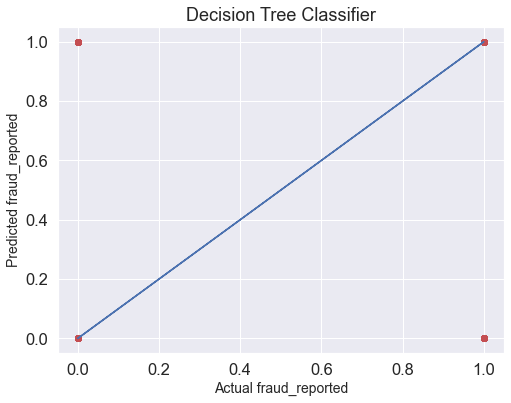

In [249]:
plt.figure(figsize=(8,6))
plt.scatter(x=y_test, y=pred_decision, color='r')
plt.plot(y_test,y_test, color='b')
plt.xlabel('Actual fraud_reported',fontsize=14)
plt.ylabel('Predicted fraud_reported',fontsize=14)
plt.title('Decision Tree Classifier',fontsize=18)
plt.show()

# Random Forest Classifier

In [250]:
from sklearn.ensemble import RandomForestClassifier

In [251]:
from sklearn.ensemble import RandomForestClassifier

parameters = {'criterion':['gini', 'entropy'],'n_estimators':[100,200,300],'max_features':['auto', 'sqrt', 'log2']}
rf = RandomForestClassifier()
clf = GridSearchCV(rf,parameters)
clf.fit(x_train,y_train)

print(clf.best_params_)

{'criterion': 'entropy', 'max_features': 'sqrt', 'n_estimators': 100}


In [252]:
rf = RandomForestClassifier(criterion='gini',n_estimators=100,max_features='log2')
rf.fit(x_train,y_train)
rf.score(x_train,y_train)
pred_random = rf.predict(x_test)

rfs = r2_score(y_test,pred_random)
for j in range(2,10):
    print("At cv:-",j)

    rfs = r2_score(y_test,pred_random)
    print('R2 Score:',rfs*100)

    rfscore = cross_val_score(rf,x,y,cv=j)
    rfc = rfscore.mean() 
    print('Cross Val Score:',rfc*100)

At cv:- 2
R2 Score: -26.916850625459855
Cross Val Score: 76.22448979591837
At cv:- 3
R2 Score: -26.916850625459855
Cross Val Score: 76.3272108715909
At cv:- 4
R2 Score: -26.916850625459855
Cross Val Score: 76.93877551020407
At cv:- 5
R2 Score: -26.916850625459855
Cross Val Score: 76.53061224489795
At cv:- 6
R2 Score: -26.916850625459855
Cross Val Score: 77.0387550501272
At cv:- 7
R2 Score: -26.916850625459855
Cross Val Score: 77.3469387755102
At cv:- 8
R2 Score: -26.916850625459855
Cross Val Score: 76.74180327868852
At cv:- 9
R2 Score: -26.916850625459855
Cross Val Score: 77.3502095367539


In [253]:
print('Error:')

print('Mean Absolute Error:',mean_absolute_error(y_test,pred_random))
print('Mean Squared Error:',mean_squared_error(y_test,pred_random))
print('Root Mean Square Error:',np.sqrt(mean_squared_error(y_test,pred_random)))


Error:
Mean Absolute Error: 0.22448979591836735
Mean Squared Error: 0.22448979591836735
Root Mean Square Error: 0.47380354147934284


In [254]:
print(accuracy_score(y_test,pred_random))
print(confusion_matrix(y_test,pred_random))
print(classification_report(y_test,pred_random))

0.7755102040816326
[[141  10]
 [ 34  11]]
              precision    recall  f1-score   support

           0       0.81      0.93      0.87       151
           1       0.52      0.24      0.33        45

    accuracy                           0.78       196
   macro avg       0.66      0.59      0.60       196
weighted avg       0.74      0.78      0.74       196



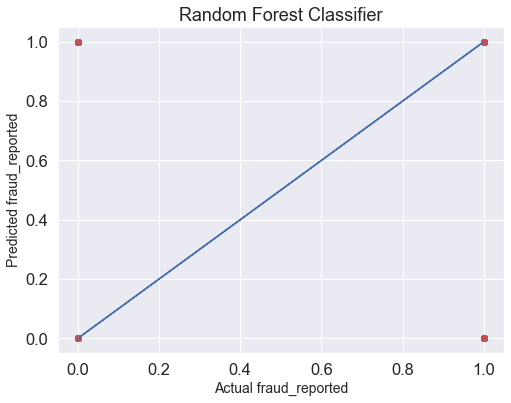

In [255]:
plt.figure(figsize=(8,6))
plt.scatter(x=y_test, y=pred_random, color='r')
plt.plot(y_test,y_test, color='b')
plt.xlabel('Actual fraud_reported',fontsize=14)
plt.ylabel('Predicted fraud_reported',fontsize=14)
plt.title('Random Forest Classifier',fontsize=18)
plt.show()

# KNeighborsClassifier

In [256]:
from sklearn.neighbors import KNeighborsClassifier

parameters = { 'weights':['uniform', 'distance'] ,'algorithm':['auto', 'ball_tree', 'kd_tree', 'brute'],'n_neighbors':[5,10,15,20,25]}
kn = KNeighborsClassifier()
clf = GridSearchCV(kn,parameters)
clf.fit(x_train,y_train)

print(clf.best_params_)

{'algorithm': 'auto', 'n_neighbors': 15, 'weights': 'uniform'}


In [257]:
kn = KNeighborsClassifier(algorithm = 'auto', weights = 'uniform',n_neighbors=25)
kn.fit(x_train,y_train)
kn.score(x_train,y_train)
pred_k = kn.predict(x_test)


kns = r2_score(y_test,pred_k)
for j in range(2,10):
    print("At cv:-",j)

    kns = r2_score(y_test,pred_k)
    print('R2 Score:',kns*100)

    knscore = cross_val_score(kn,x,y,cv=j)
    knc = knscore.mean() 
    print('Cross Val Score:',knc*100)

At cv:- 2
R2 Score: -32.68579838116257
Cross Val Score: 75.91836734693878
At cv:- 3
R2 Score: -32.68579838116257
Cross Val Score: 76.12239920451775
At cv:- 4
R2 Score: -32.68579838116257
Cross Val Score: 75.81632653061226
At cv:- 5
R2 Score: -32.68579838116257
Cross Val Score: 75.3061224489796
At cv:- 6
R2 Score: -32.68579838116257
Cross Val Score: 75.9189984537882
At cv:- 7
R2 Score: -32.68579838116257
Cross Val Score: 75.51020408163265
At cv:- 8
R2 Score: -32.68579838116257
Cross Val Score: 75.61058909769426
At cv:- 9
R2 Score: -32.68579838116257
Cross Val Score: 75.51062785517423


In [258]:
print('Error:')

print('Mean Absolute Error:',mean_absolute_error(y_test,pred_k))
print('Mean Squared Error:',mean_squared_error(y_test,pred_k))
print('Root Mean Square Error:',np.sqrt(mean_squared_error(y_test,pred_k)))


Error:
Mean Absolute Error: 0.23469387755102042
Mean Squared Error: 0.23469387755102042
Root Mean Square Error: 0.4844521416518049


In [259]:
print(accuracy_score(y_test,pred_k))
print(confusion_matrix(y_test,pred_k))
print(classification_report(y_test,pred_k))

0.7653061224489796
[[150   1]
 [ 45   0]]
              precision    recall  f1-score   support

           0       0.77      0.99      0.87       151
           1       0.00      0.00      0.00        45

    accuracy                           0.77       196
   macro avg       0.38      0.50      0.43       196
weighted avg       0.59      0.77      0.67       196



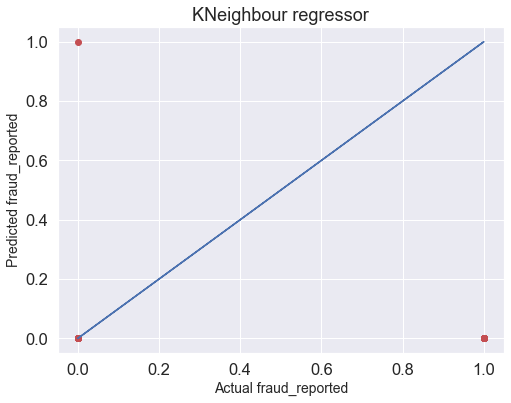

In [260]:
plt.figure(figsize=(8,6))
plt.scatter(x=y_test, y=pred_k, color='r')
plt.plot(y_test,y_test, color='b')
plt.xlabel('Actual fraud_reported',fontsize=14)
plt.ylabel('Predicted fraud_reported',fontsize=14)
plt.title('KNeighbour regressor',fontsize=18)
plt.show()


# Support Vector Classifier

In [261]:
from sklearn.svm import SVC


parameters = {'kernel':['linear', 'poly', 'rbf'],'gamma':['scale', 'auto'],'cache_size':[50,100,200,300] }
sc = SVC()
clf = GridSearchCV(sc,parameters)
clf.fit(x_train,y_train)

print(clf.best_params_)

{'cache_size': 50, 'gamma': 'scale', 'kernel': 'linear'}


In [262]:
sv = SVC(kernel='linear',gamma='scale',cache_size=50)
sv.fit(x_train,y_train)
sv.score(x_train,y_train)
pred_support = sv.predict(x_test)



svs = r2_score(y_test,pred_support)
for j in range(2,10):
    print("At cv:-",j)

    svs = r2_score(y_test,pred_support)
    print('R2 Score:',svs*100)

    svscore = cross_val_score(sv,x,y,cv=j)
    svc = svscore.mean() 
    print('Cross Val Score:',svc*100)

At cv:- 2
R2 Score: -0.9565857247976206
Cross Val Score: 78.97959183673468
At cv:- 3
R2 Score: -0.9565857247976206
Cross Val Score: 78.77463212072318
At cv:- 4
R2 Score: -0.9565857247976206
Cross Val Score: 79.28571428571429
At cv:- 5
R2 Score: -0.9565857247976206
Cross Val Score: 80.91836734693875
At cv:- 6
R2 Score: -0.9565857247976206
Cross Val Score: 80.9180008978004
At cv:- 7
R2 Score: -0.9565857247976206
Cross Val Score: 80.91836734693877
At cv:- 8
R2 Score: -0.9565857247976206
Cross Val Score: 80.92096494735439
At cv:- 9
R2 Score: -0.9565857247976206
Cross Val Score: 80.91988522671501


In [263]:
print('Error:')

print('Mean Absolute Error:',mean_absolute_error(y_test,pred_support))
print('Mean Squared Error:',mean_squared_error(y_test,pred_support))
print('Root Mean Square Error:',np.sqrt(mean_squared_error(y_test,pred_support)))


Error:
Mean Absolute Error: 0.17857142857142858
Mean Squared Error: 0.17857142857142858
Root Mean Square Error: 0.4225771273642583


In [264]:
print(accuracy_score(y_test,pred_support))
print(confusion_matrix(y_test,pred_support))
print(classification_report(y_test,pred_support))

0.8214285714285714
[[128  23]
 [ 12  33]]
              precision    recall  f1-score   support

           0       0.91      0.85      0.88       151
           1       0.59      0.73      0.65        45

    accuracy                           0.82       196
   macro avg       0.75      0.79      0.77       196
weighted avg       0.84      0.82      0.83       196



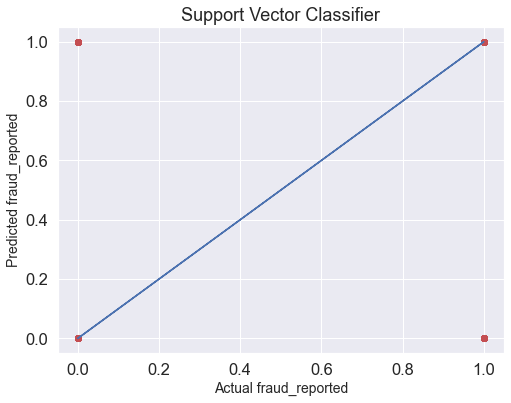

In [265]:
plt.figure(figsize=(8,6))
plt.scatter(x=y_test, y=pred_support, color='r')
plt.plot(y_test,y_test, color='b')
plt.xlabel('Actual fraud_reported',fontsize=14)
plt.ylabel('Predicted fraud_reported',fontsize=14)
plt.title('Support Vector Classifier',fontsize=18)
plt.show()

# We tested 7 models out of which Logistic Regression performing good:

# plotting Auc-Roc curve..with logistic regression prediction..

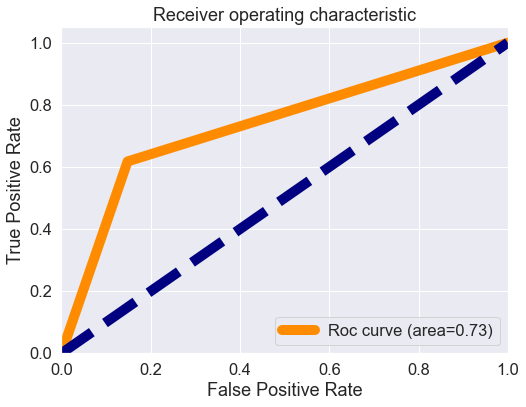

In [273]:
from sklearn.metrics import roc_curve,auc
    
fpr,tpr,threshold=roc_curve(pred_test,y_test)
roc_auc=auc(fpr,tpr)
plt.figure(figsize=(8,6))
plt.plot(fpr,tpr,color='darkorange',lw=10,label='Roc curve (area=%0.2f)'% roc_auc)
plt.plot([0,1],[0,1],color='navy',lw=10,linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

# Conclusion

In [267]:
import numpy as np
a=np.array(y_test)
a

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0])

In [268]:
predicted=np.array(pred_test)
predicted

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0])

In [269]:
df_com=pd.DataFrame({"original":a,"predicted":predicted}, index= range(len(a)))
df_com

original  predicted
0           0          0
1           0          0
2           0          0
3           0          0
4           0          0
..        ...        ...
191         0          0
192         0          0
193         1          1
194         0          1
195         0          0

[196 rows x 2 columns]

In [270]:
df_com.sample(10)

original  predicted
39          0          0
132         0          0
154         0          0
74          0          0
111         0          0
195         0          0
152         0          0
173         1          1
130         0          0
155         0          0

# The best model is Logistic regression as r2_score is best from above tested models.

In [271]:
rscore=cross_val_score(lr,x,y,cv=7)
print("Cross validation score is :-",lsc*100)
print("accuracy_score is :-",lrs*100)

Cross validation score is :- 77.858005814173
accuracy_score is :- 81.12244897959184


Our Model performs with Accuracy Score 81.22.5%...

# Saving the best models with initials...using pickle library

In [274]:
import pickle
filename = 'Insurance_Claims_Fraud_Detection.pkl'
pickle.dump(lr, open(filename, 'wb'))